In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Sectors assigned to Group 7 : Energy, Financials, Materials

## Energy Sector Stocks
#### 

### 1. ExxonMobil (XOM) 
#### ExxonMobil Corporation is an American multinational oil and gas corporation headquartered in Irving, Texas. The company is vertically-integrated across the entire oil and gas industry, and within it is also a chemicals division which produces plastic, synthetic rubber, and other chemical products. ExxonMobil is the largest investor-owned oil company in the world, and the largest of the Big Oil companies in both production and market value.

### 2. Chevron Corporation (CVX)
#### Chevron Corporation is an American multinational energy corporation. The second-largest direct descendant of Standard Oil. It is headquartered in San Ramon, California, and active in more than 180 countries. Chevron is one of the largest companies in the world and the second largest oil company based in the United States by revenue.

### 3. Schlumberger (SLB)
#### Schlumberger Limited is an oilfield services company. Schlumberger has four principal executive offices located in Paris, Houston, London, and The Hague. Schlumberger is the world's largest offshore drilling compan and biggest offshore drilling contractor (in terms of revenue) in the world.



## Financial Sector Stocks
#### 

### 1. BlackRock (BLK) 
#### BlackRock, Inc. is an American multi-national investment company based in New York City. Founded in 1988, initially as a risk management and fixed income institutional asset manager, BlackRock is the world's largest asset manager, with US$10 trillion in assets under management as of January 2022. BlackRock operates globally with 70 offices in 30 countries, and clients in 100 countries.

### 2. Lincoln Financial Group (LNC)
#### Lincoln National Corporation operates multiple insurance and investment management businesses through subsidiary companies. LNC was organized under the laws of the state of Indiana in 1968, and maintains its principal executive offices in Radnor, Pennsylvania.

### 3. Citigroup (C)
#### Citigroup Inc. or Citi is an American multinational investment bank and financial services corporation headquartered in New York City. Citigroup is the third largest banking institution in the United States; alongside JPMorgan Chase, Bank of America, and Wells Fargo, it is one of the Big Four banking institutions of the United States.



## Materials Sector Stocks
#### The stocks selected under Materials sectors are of those firms which are the among the leading companies in the world. These stocks are large cap stocks, i.e. they have a market cap of $10 Billion or more. Large-caps are generally safer investments than their mid- and small-cap counterparts because the companies are more established. 

### 1. Barrick Gold (GOLD) 
#### Barrick Gold Corporation is a mining company that produces gold and copper with 16 operating sites in 13 countries. It is headquartered in Toronto, Ontario, Canada. Barrick had been the world's largest gold mining company until Newmont Corporation acquired Goldcorp in 2019.

### 2. Newmont Corporation (NEM)
#### Newmont Corporation is a gold mining company based in Greenwood Village, Colorado, United States. It is the world's largest gold mining corporation. In addition to gold, Newmont mines copper, silver, zinc and lead.

### 3. PPG Industries (PPG)
#### PPG Industries, Inc. is an American Fortune 500 company and global supplier of paints, coatings, and specialty materials. With headquarters in Pittsburgh, Pennsylvania, PPG operates in more than 70 countries around the globe. By revenue it is the largest coatings company in the world

# Download Stock Market Data!
Now let's pull down the stock market data of our shortlisted stocks.

In [ ]:
# Assign the ticker list that we want to scrap
#Energy: ExxonMobil, Chevron, Schlumberger #Finacial: BlackRock, Lincoln, Citi #Materials: Nucor, Linde, PPG Industries
tickers_list = [ 'XOM', 'CVX', 'SLB', 'BLK', 'LNC', 'C', 'GOLD', 'NEM', 'PPG'] 
 
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2017',end_date='12/31/2021',interval='1d') for ticker in tickers_list}

/usr/local/lib/python3.8/dist-packages/yahoo_fin/stock_info.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['ticker'] = ticker.upper()


In [ ]:
# take a peak!
dow_prices

{'XOM':                  open       high        low      close   adjclose    volume  \
 2017-01-03  90.940002  91.339996  90.150002  90.889999  67.322083  10360600   
 2017-01-04  91.120003  91.150002  89.750000  89.889999  66.581383   9434200   
 2017-01-05  90.190002  90.300003  88.440002  88.550003  65.588844  14443200   
 2017-01-06  88.790001  88.980003  87.820000  88.500000  65.551826  16518100   
 2017-01-09  88.220001  88.220001  86.550003  87.040001  64.470398  13762300   
 ...               ...        ...        ...        ...        ...       ...   
 2021-12-23  61.169998  61.840000  61.000000  61.020000  58.691696  13543300   
 2021-12-27  60.930000  61.950001  60.419998  61.889999  59.528500  12593700   
 2021-12-28  61.910000  62.310001  61.400002  61.689999  59.336128  12781000   
 2021-12-29  61.480000  61.599998  60.919998  61.150002  58.816734  12733600   
 2021-12-30  61.220001  61.599998  60.770000  60.790001  58.470470  11940300   
 
            ticker  
 2017-01-0

# EDA of Stocks

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the NFLX (one sample)
prep_data = pd.DataFrame(dow_prices['XOM']['adjclose']).rename(columns = {"adjclose":"XOM"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data.head()

,XOM,CVX,SLB,BLK,LNC,C,GOLD,NEM,PPG
2017-01-03,67.322083,91.029167,70.596268,332.187378,56.851940,50.942432,14.569462,29.582172,86.088387
2017-01-04,66.581383,91.005997,71.120743,332.385071,57.574165,51.631859,14.578354,29.864065,87.914070
2017-01-05,65.588844,90.612061,71.012520,328.843384,56.775467,50.732243,15.440614,31.239384,86.422783
2017-01-06,65.551826,90.249039,71.994896,330.356232,57.475246,50.908798,15.049483,30.257010,86.395660
2017-01-09,64.470398,89.476616,71.403786,327.020996,56.766933,50.631344,15.085040,30.205755,87.082550


In [ ]:
prep_data.shape

(1258, 9)

In [ ]:
# Let's look at the stock movement in the past few years. From the code below, 
# we can see the mean stock price since 2017, 
# and the min and max price that the stock has achieved.
prep_data.describe()

,XOM,CVX,SLB,BLK,LNC,C,GOLD,NEM,PPG
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,55.566483,92.940419,39.655120,511.462591,54.563318,58.067502,16.470466,40.871790,114.843717
std,10.148605,11.119457,16.275704,170.376520,11.056374,8.507028,4.598786,12.493559,23.532118
min,26.768913,47.611786,11.444782,306.718384,15.514375,31.944044,8.804610,25.675426,69.151031
25%,52.351723,84.748360,27.607612,388.946800,51.003112,52.793983,12.289998,30.752478,98.451769
50%,59.213484,95.384792,35.455328,451.063721,56.876816,59.082785,15.773883,34.476894,106.239677
75%,62.310663,101.337236,56.185205,560.893997,61.431351,64.191420,19.371606,54.538144,126.317434
max,68.649818,114.659744,72.827377,940.248962,74.555054,75.656418,28.171627,69.558792,177.665970


In [ ]:
prep_data.isnull().sum().sum() #no missing value

0

## Data Visualization

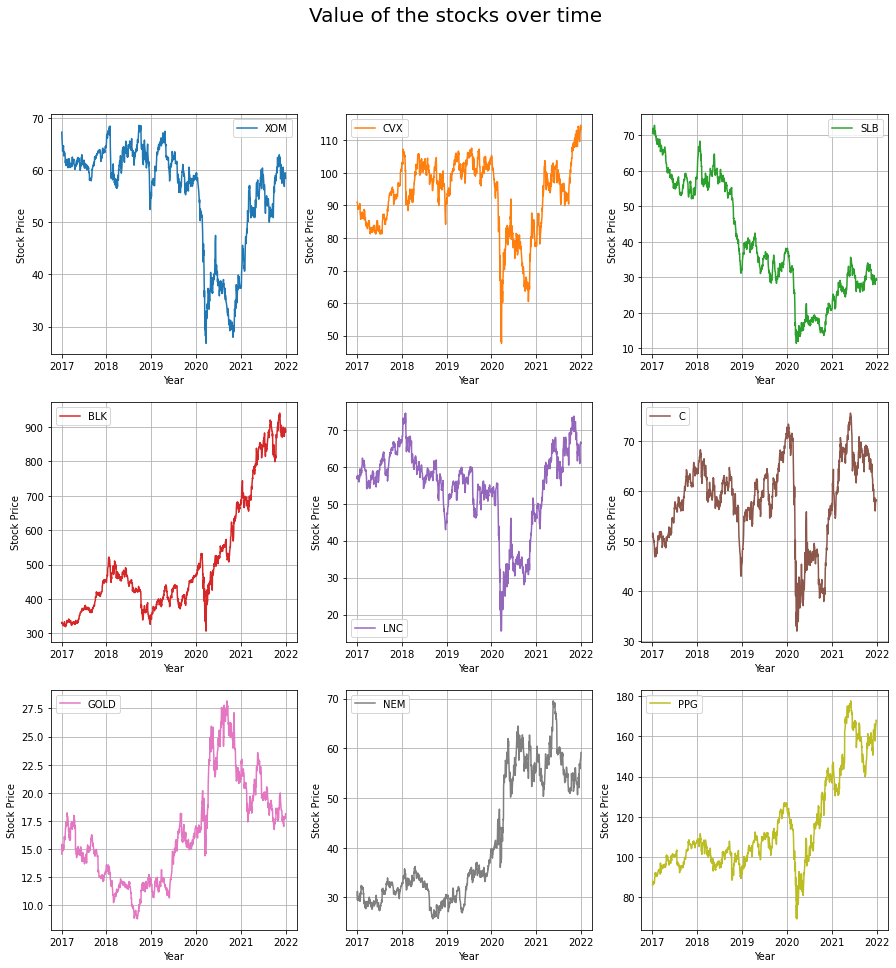

In [ ]:
# Let's visualize the movement of our shortlisted stocks since 2017
fig,ax = plt.subplots(3,3,figsize=(15,15))
prep_data.plot(ax = ax, subplots=True,
        grid=True,
         figsize=(15,15))
for i in [0,1,2]:
  for j in [0,1,2]:
    ax[i,j].set_xlabel('Year')
    ax[i,j].set_ylabel('Stock Price')
fig.suptitle("Value of the stocks over time", fontsize=20)
plt.show()

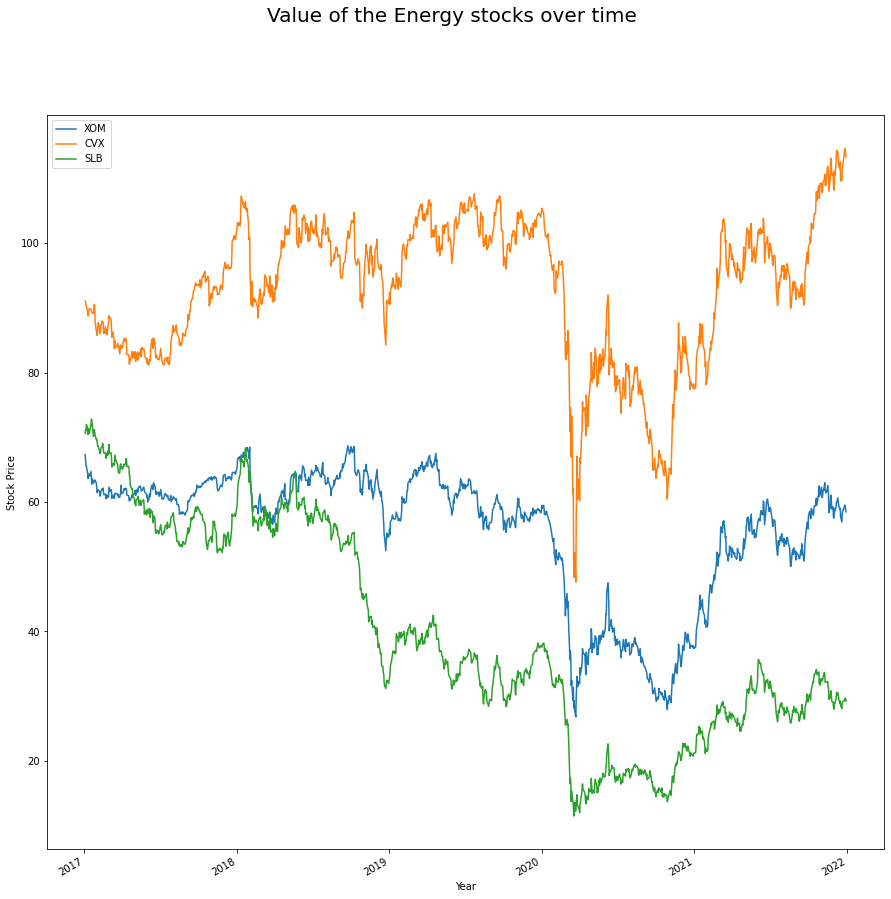

In [ ]:
# Let's visualize the movement of our shortlisted stocks by sector since 2017
fig,ax = plt.subplots(figsize=(15,15))
prep_data.iloc[:,0:3].plot(ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price')
fig.suptitle("Value of the Energy stocks over time", fontsize=20)
plt.show()

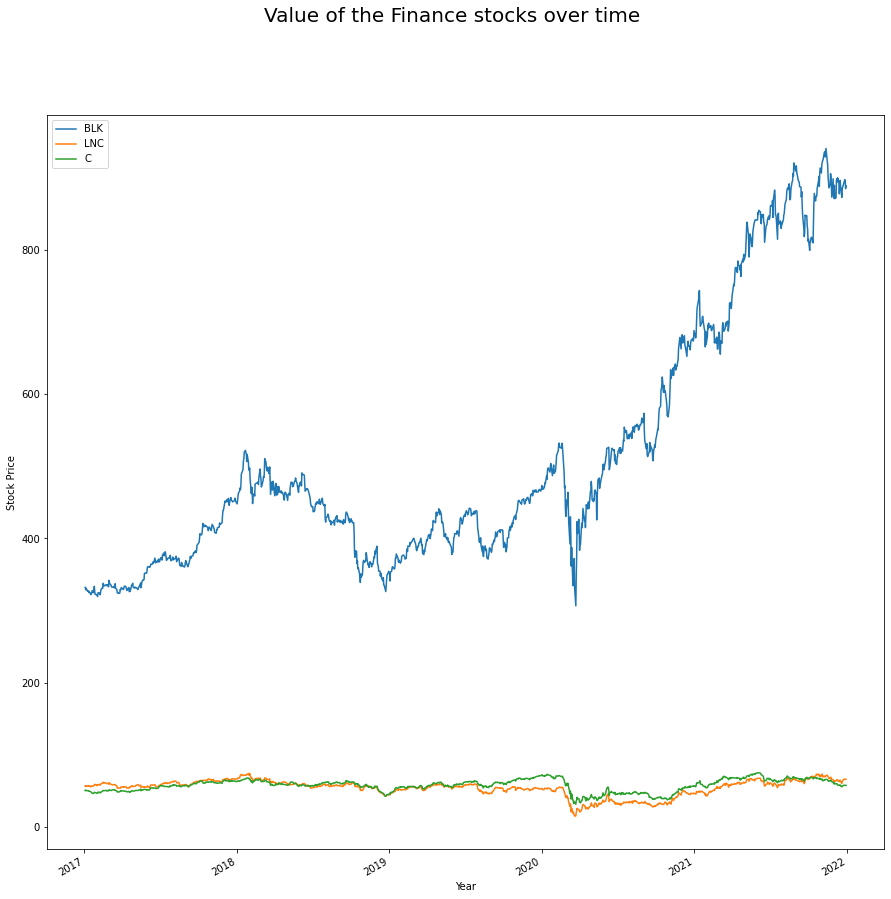

In [ ]:
# Let's visualize the movement of our shortlisted stocks by sector since 2017
fig,ax = plt.subplots(figsize=(15,15))
prep_data.iloc[:,3:6].plot(ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price')
fig.suptitle("Value of the Finance stocks over time", fontsize=20)
plt.show()

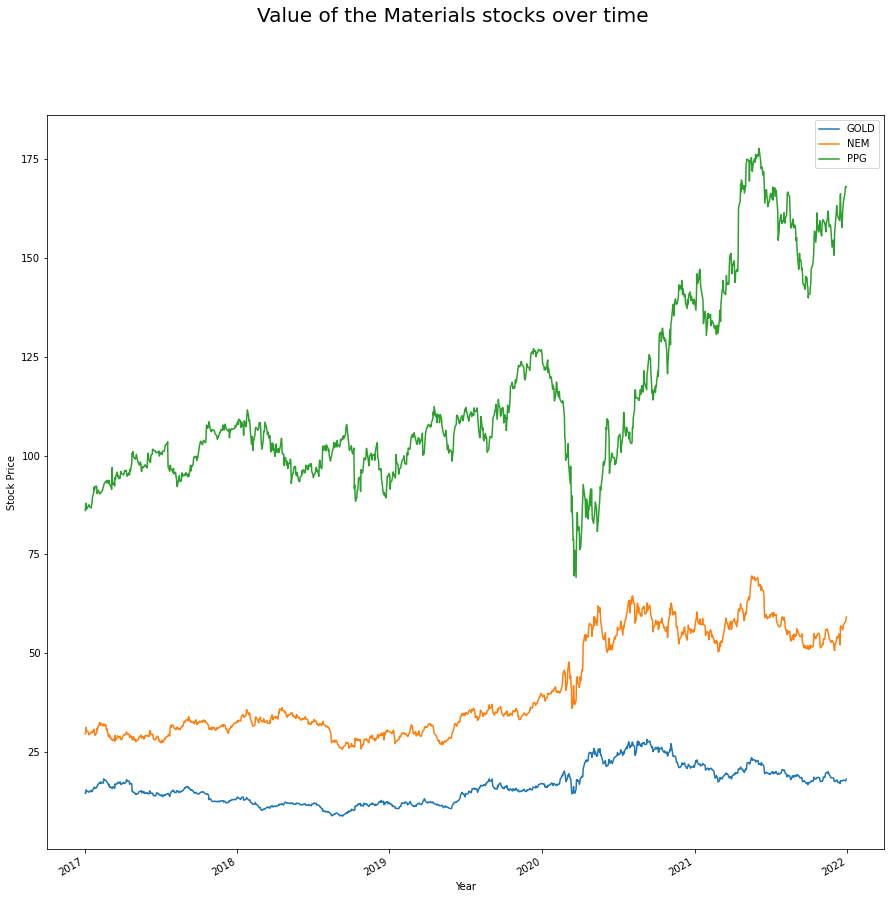

In [ ]:
# Let's visualize the movement of our shortlisted stocks by sector since 2017
fig,ax = plt.subplots(figsize=(15,15))
prep_data.iloc[:,6:9].plot(ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('Stock Price')
fig.suptitle("Value of the Materials stocks over time", fontsize=20)
plt.show()

# Data Preparation for Non-Linear Optimization

In [ ]:
day = np.arange(1, len(prep_data) + 1) #generate list of trading days
prep_data['Day'] = day

In [ ]:
# Get list of columns 
cols = prep_data.columns.to_list() 

In [ ]:
# Rearranging the columns to make day as the first column
cols = cols = cols[-1:] + cols[:-1]
data = prep_data[cols]
data.head()

,Day,XOM,CVX,SLB,BLK,LNC,C,GOLD,NEM,PPG
2017-01-03,1,67.322083,91.029167,70.596268,332.187378,56.851940,50.942432,14.569462,29.582172,86.088387
2017-01-04,2,66.581383,91.005997,71.120743,332.385071,57.574165,51.631859,14.578354,29.864065,87.914070
2017-01-05,3,65.588844,90.612061,71.012520,328.843384,56.775467,50.732243,15.440614,31.239384,86.422783
2017-01-06,4,65.551826,90.249039,71.994896,330.356232,57.475246,50.908798,15.049483,30.257010,86.395660
2017-01-09,5,64.470398,89.476616,71.403786,327.020996,56.766933,50.631344,15.085040,30.205755,87.082550


In [ ]:
# shows the different data types
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1258 non-null   int64  
 1   XOM     1258 non-null   float64
 2   CVX     1258 non-null   float64
 3   SLB     1258 non-null   float64
 4   BLK     1258 non-null   float64
 5   LNC     1258 non-null   float64
 6   C       1258 non-null   float64
 7   GOLD    1258 non-null   float64
 8   NEM     1258 non-null   float64
 9   PPG     1258 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 108.1 KB


## Caclulating Returns

In [ ]:
# Calculating returns using log of close values
returns = pd.DataFrame()
returns['Day'] = data.loc[:,'Day']
for i in cols[1:]:
  col_name = i+"_returns"
  returns.loc[:,col_name] = np.log(data.loc[:,i]).diff()
  returns.loc['2017-01-03',col_name] = 0.0
returns.head()

,Day,XOM_returns,CVX_returns,SLB_returns,BLK_returns,LNC_returns,C_returns,GOLD_returns,NEM_returns,PPG_returns
2017-01-03,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,2,-0.011063,-0.000255,0.007402,0.000595,0.012624,0.013443,0.000610,0.009484,0.020985
2017-01-05,3,-0.015019,-0.004338,-0.001523,-0.010713,-0.013970,-0.017577,0.057463,0.045024,-0.017109
2017-01-06,4,-0.000565,-0.004014,0.013739,0.004590,0.012250,0.003474,-0.025658,-0.031952,-0.000314
2017-01-09,5,-0.016635,-0.008596,-0.008244,-0.010147,-0.012400,-0.005465,0.002360,-0.001695,0.007919


In [ ]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2017-01-03 to 2021-12-30
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           1258 non-null   int64  
 1   XOM_returns   1258 non-null   float64
 2   CVX_returns   1258 non-null   float64
 3   SLB_returns   1258 non-null   float64
 4   BLK_returns   1258 non-null   float64
 5   LNC_returns   1258 non-null   float64
 6   C_returns     1258 non-null   float64
 7   GOLD_returns  1258 non-null   float64
 8   NEM_returns   1258 non-null   float64
 9   PPG_returns   1258 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 140.4 KB


## Visualization of Returns

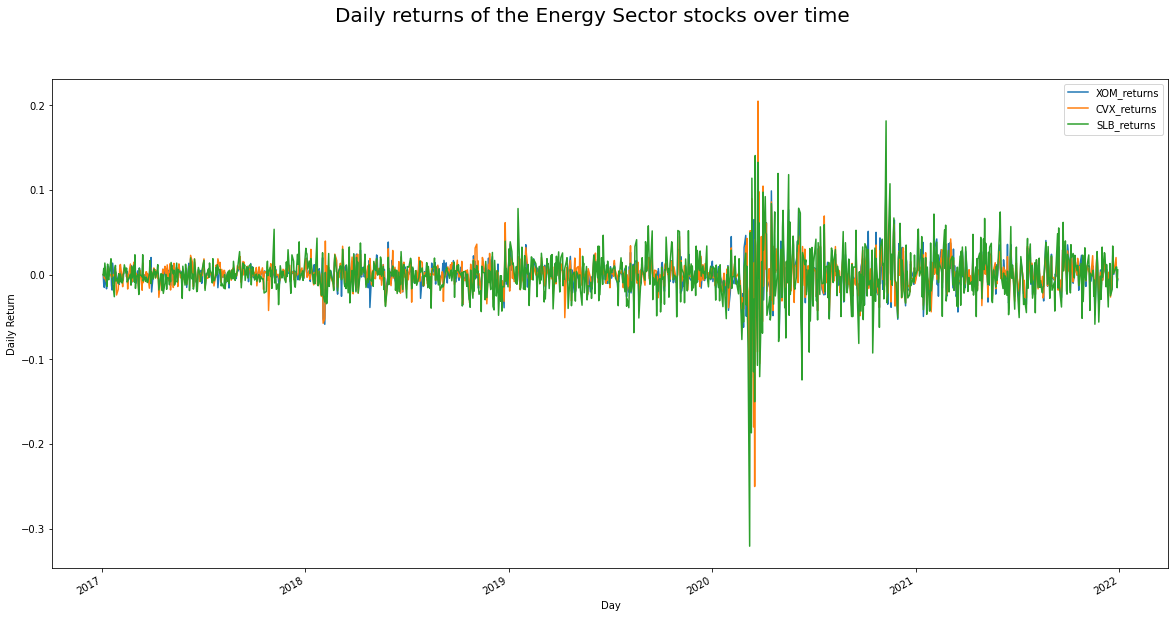

In [ ]:
# Visualize the daily returns of the Energy Sector stocks
fig, ax = plt.subplots(figsize = (20,10))
returns.iloc[:,1:4].plot(ax = ax)
ax.set_xlabel('Day')
ax.set_ylabel('Daily Return')
fig.suptitle("Daily returns of the Energy Sector stocks over time", fontsize=20)
plt.show() 

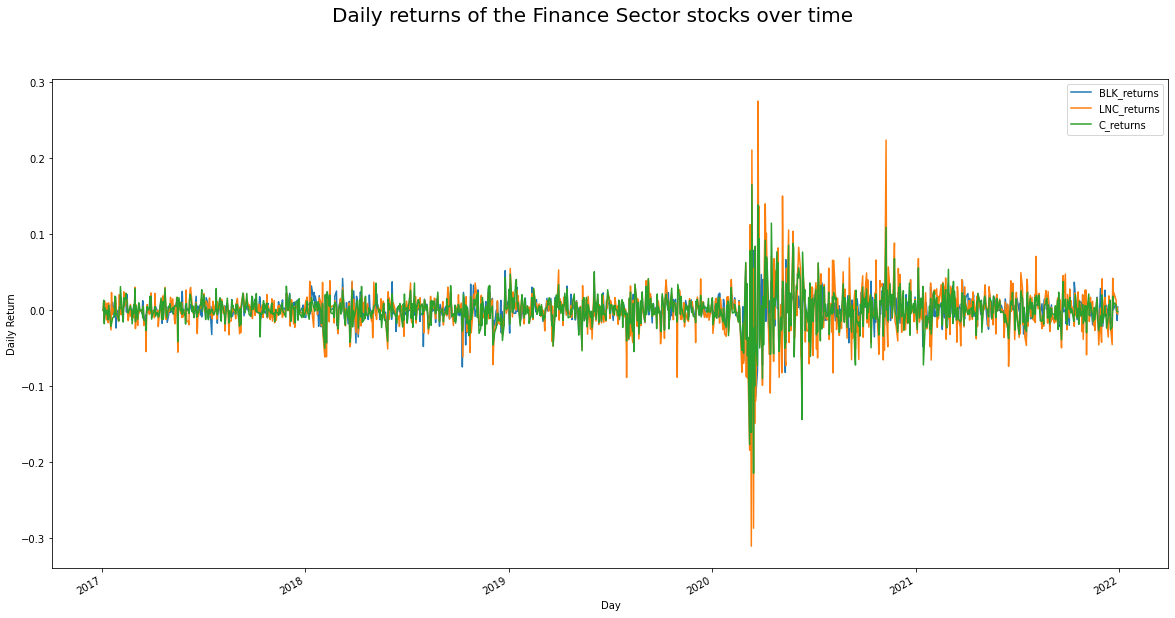

In [ ]:
# Visualize the daily returns of the Finance Sector stocks
fig, ax = plt.subplots(figsize = (20,10))
returns.iloc[:,4:7].plot(ax = ax)
ax.set_xlabel('Day')
ax.set_ylabel('Daily Return')
fig.suptitle("Daily returns of the Finance Sector stocks over time", fontsize=20)
plt.show() 

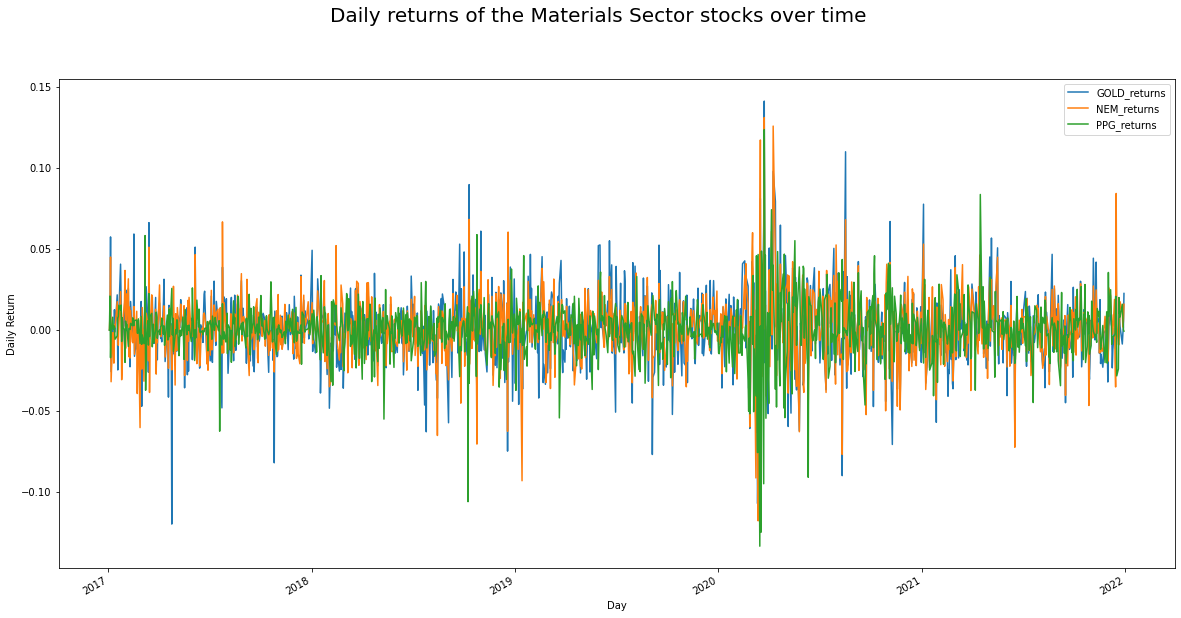

In [ ]:
# Visualize the daily returns of the Materials Sector stocks
fig, ax = plt.subplots(figsize = (20,10))
returns.iloc[:,7:10].plot(ax = ax)
ax.set_xlabel('Day')
ax.set_ylabel('Daily Return')
fig.suptitle("Daily returns of the Materials Sector stocks over time", fontsize=20)
plt.show() 

In [ ]:
# Generate the data table
returns.describe()

,Day,XOM_returns,CVX_returns,SLB_returns,BLK_returns,LNC_returns,C_returns,GOLD_returns,NEM_returns,PPG_returns
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,629.500000,-0.000112,0.000174,-0.000697,0.000782,0.000123,0.000104,0.000174,0.000551,0.000531
std,363.297628,0.019145,0.021004,0.028232,0.018134,0.031715,0.023168,0.021836,0.019451,0.017183
min,1.000000,-0.130391,-0.250062,-0.320500,-0.146815,-0.310212,-0.214414,-0.119820,-0.117839,-0.133486
25%,315.250000,-0.008642,-0.007368,-0.012817,-0.006858,-0.011261,-0.008844,-0.011268,-0.008784,-0.006434
50%,629.500000,-0.000131,0.000474,-0.000609,0.001173,0.000947,0.000135,0.000433,0.000551,0.000833
75%,943.750000,0.008246,0.007967,0.011166,0.009182,0.012710,0.009984,0.010943,0.010312,0.008302
max,1258.000000,0.119442,0.204904,0.181555,0.126843,0.275358,0.165381,0.141327,0.131188,0.123742


In [ ]:
returns.drop('Day', axis = 1, inplace = True)


## Avg Returns and Standard Deviation of returns

In [ ]:
Avg_Return = pd.DataFrame(np.mean(returns) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(returns) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

              Avg_Return
XOM_returns    -0.000112
CVX_returns     0.000174
SLB_returns    -0.000697
BLK_returns     0.000782
LNC_returns     0.000123
C_returns       0.000104
GOLD_returns    0.000174
NEM_returns     0.000551
PPG_returns     0.000531
              Std_Dev_Return
XOM_returns         0.019137
CVX_returns         0.020996
SLB_returns         0.028221
BLK_returns         0.018127
LNC_returns         0.031703
C_returns           0.023159
GOLD_returns        0.021827
NEM_returns         0.019444
PPG_returns         0.017176


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


## Covariance and Correlation Matrix

In [ ]:
Covariance_matrix = returns.cov()
Covariance_matrix

,XOM_returns,CVX_returns,SLB_returns,BLK_returns,LNC_returns,C_returns,GOLD_returns,NEM_returns,PPG_returns
XOM_returns,0.000367,0.000336,0.000426,0.000190,0.000421,0.000306,0.000037,0.000059,0.000170
CVX_returns,0.000336,0.000441,0.000460,0.000215,0.000462,0.000346,0.000062,0.000079,0.000210
SLB_returns,0.000426,0.000460,0.000797,0.000250,0.000608,0.000449,0.000047,0.000068,0.000242
BLK_returns,0.000190,0.000215,0.000250,0.000329,0.000388,0.000282,0.000044,0.000066,0.000182
LNC_returns,0.000421,0.000462,0.000608,0.000388,0.001006,0.000619,0.000025,0.000056,0.000333
C_returns,0.000306,0.000346,0.000449,0.000282,0.000619,0.000537,-0.000004,0.000024,0.000248
GOLD_returns,0.000037,0.000062,0.000047,0.000044,0.000025,-0.000004,0.000477,0.000336,0.000026
NEM_returns,0.000059,0.000079,0.000068,0.000066,0.000056,0.000024,0.000336,0.000378,0.000055
PPG_returns,0.000170,0.000210,0.000242,0.000182,0.000333,0.000248,0.000026,0.000055,0.000295


In [ ]:
Corr_matrix = returns.corr()
Corr_matrix

,XOM_returns,CVX_returns,SLB_returns,BLK_returns,LNC_returns,C_returns,GOLD_returns,NEM_returns,PPG_returns
XOM_returns,1.000000,0.835727,0.788817,0.546692,0.693661,0.689408,0.087628,0.157791,0.515934
CVX_returns,0.835727,1.000000,0.775538,0.563828,0.693674,0.710392,0.134970,0.193379,0.581642
SLB_returns,0.788817,0.775538,1.000000,0.488098,0.679555,0.686469,0.076009,0.124100,0.499088
BLK_returns,0.546692,0.563828,0.488098,1.000000,0.674507,0.671870,0.110320,0.188473,0.584610
LNC_returns,0.693661,0.693674,0.679555,0.674507,1.000000,0.842199,0.035971,0.090144,0.611532
C_returns,0.689408,0.710392,0.686469,0.671870,0.842199,1.000000,-0.008229,0.053638,0.623308
GOLD_returns,0.087628,0.134970,0.076009,0.110320,0.035971,-0.008229,1.000000,0.790621,0.068200
NEM_returns,0.157791,0.193379,0.124100,0.188473,0.090144,0.053638,0.790621,1.000000,0.163347
PPG_returns,0.515934,0.581642,0.499088,0.584610,0.611532,0.623308,0.068200,0.163347,1.000000


In [ ]:
# creating covariance table on stock return dataframe
df_cov = returns.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = returns.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
              XOM_returns  CVX_returns  SLB_returns  BLK_returns  LNC_returns  \
XOM_returns      0.000367     0.000336     0.000426     0.000190     0.000421   
CVX_returns      0.000336     0.000441     0.000460     0.000215     0.000462   
SLB_returns      0.000426     0.000460     0.000797     0.000250     0.000608   
BLK_returns      0.000190     0.000215     0.000250     0.000329     0.000388   
LNC_returns      0.000421     0.000462     0.000608     0.000388     0.001006   
C_returns        0.000306     0.000346     0.000449     0.000282     0.000619   
GOLD_returns     0.000037     0.000062     0.000047     0.000044     0.000025   
NEM_returns      0.000059     0.000079     0.000068     0.000066     0.000056   
PPG_returns      0.000170     0.000210     0.000242     0.000182     0.000333   

              C_returns  GOLD_returns  NEM_returns  PPG_returns  
XOM_returns    0.000306      0.000037     0.000059     0.000170  
CVX_returns    0.000346      0.000062 

In [ ]:
# get the list of stocks
stocks = cols[1:]
stocks

['XOM', 'CVX', 'SLB', 'BLK', 'LNC', 'C', 'GOLD', 'NEM', 'PPG']

In [ ]:
stock = returns.columns.to_list()
stock

['XOM_returns',
 'CVX_returns',
 'SLB_returns',
 'BLK_returns',
 'LNC_returns',
 'C_returns',
 'GOLD_returns',
 'NEM_returns',
 'PPG_returns']

# Build the Nonlinear Optimization Model

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables


m.XOM = Var(within=NonNegativeReals, bounds=(0,1))
m.CVX = Var(within=NonNegativeReals, bounds=(0,1))
m.SLB = Var(within=NonNegativeReals, bounds=(0,1))
m.BLK = Var(within=NonNegativeReals, bounds=(0,1))
m.LNC = Var(within=NonNegativeReals, bounds=(0,1))
m.C = Var(within=NonNegativeReals, bounds=(0,1))
m.GOLD = Var(within=NonNegativeReals, bounds=(0,1))
m.NEM = Var(within=NonNegativeReals, bounds=(0,1))
m.PPG = Var(within=NonNegativeReals, bounds=(0,1))


In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.XOM*df_return[0] + 
                        m.CVX*df_return[1] + 
                        m.SLB*df_return[2] +
                        m.BLK*df_return[3] + 
                        m.LNC*df_return[4] +
                        m.C*df_return[5] +
                        m.GOLD*df_return[6] +
                        m.NEM*df_return[7] +
                        m.PPG*df_return[8],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.XOM + m.CVX + m.SLB + m.BLK + m.LNC + m.C + m.GOLD + m.NEM + m.PPG == 1)

# 2. Set maximum risk: WE ARE INCLUDING THIS CONSTRAINT NOW FOR TECHNICAL REASONS (see below), YOU CAN (and should!) IGNORE IT FOR NOW!
m.total_risk = Constraint(expr = m.XOM + m.CVX + m.SLB + m.BLK + m.LNC + m.C + m.GOLD + m.NEM + m.PPG >= 0.0)

In [ ]:
# creating calculations table for calculate the risk
# 3. Calculate risk
def calc_risk(m):
  variables = m.XOM,m.CVX,m.SLB,m.BLK,m.LNC,m.C,m.GOLD,m.NEM,m.PPG
  tickers = ['XOM_returns','CVX_returns','SLB_returns','BLK_returns','LNC_returns','C_returns','GOLD_returns','NEM_returns','PPG_returns']
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*df_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk should be less than 0.01
max_risk = 0.0004
# Sequence of risk levels
risk_limits = np.arange(0.000155, max_risk, 0.0000025) # take tiny steps
risk_limits

array([0.000155 , 0.0001575, 0.00016  , 0.0001625, 0.000165 , 0.0001675,
       0.00017  , 0.0001725, 0.000175 , 0.0001775, 0.00018  , 0.0001825,
       0.000185 , 0.0001875, 0.00019  , 0.0001925, 0.000195 , 0.0001975,
       0.0002   , 0.0002025, 0.000205 , 0.0002075, 0.00021  , 0.0002125,
       0.000215 , 0.0002175, 0.00022  , 0.0002225, 0.000225 , 0.0002275,
       0.00023  , 0.0002325, 0.000235 , 0.0002375, 0.00024  , 0.0002425,
       0.000245 , 0.0002475, 0.00025  , 0.0002525, 0.000255 , 0.0002575,
       0.00026  , 0.0002625, 0.000265 , 0.0002675, 0.00027  , 0.0002725,
       0.000275 , 0.0002775, 0.00028  , 0.0002825, 0.000285 , 0.0002875,
       0.00029  , 0.0002925, 0.000295 , 0.0002975, 0.0003   , 0.0003025,
       0.000305 , 0.0003075, 0.00031  , 0.0003125, 0.000315 , 0.0003175,
       0.00032  , 0.0003225, 0.000325 , 0.0003275, 0.00033  , 0.0003325,
       0.000335 , 0.0003375, 0.00034  , 0.0003425, 0.000345 , 0.0003475,
       0.00035  , 0.0003525, 0.000355 , 0.0003575, 

# Run the Model 
Some of our runs may not be feasible, so we want to filter out those cases.

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()
  # store our allocation proportions
  param_analysis[r] = [m.XOM(),m.CVX(),m.SLB(),m.BLK(),m.LNC(),m.C(),m.GOLD(),m.NEM(),m.PPG()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.XOM()*df_return[0] + m.CVX()*df_return[1] + m.SLB()*df_return[2] + m.BLK()*df_return[3] + m.LNC()*df_return[4] + m.C()*df_return[5] + m.GOLD()*df_return[6] + m.NEM()*df_return[7] + m.PPG()*df_return[8]

  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  - termination condition: infeasible
  - message from solver: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.0980982780456543
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ======

# Parameter Analysis
Let's see what the efficient frontier looks like, and the allocation!

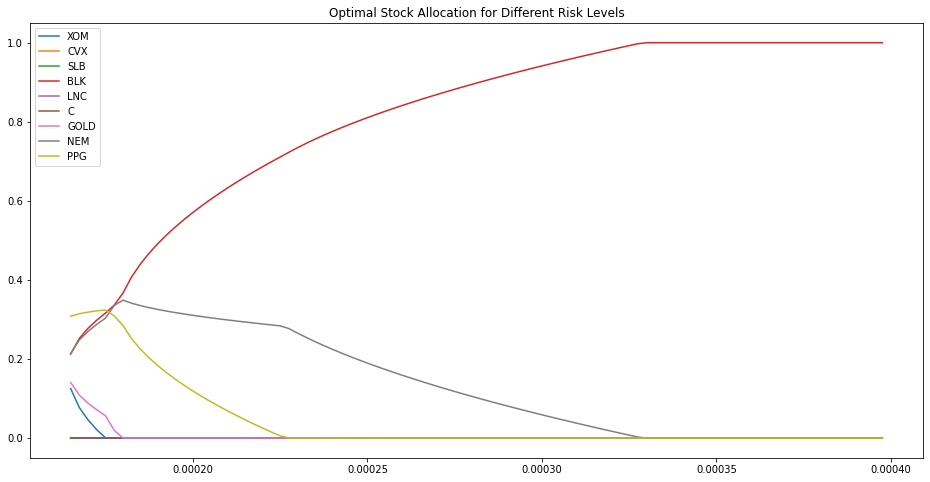

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
fig, ax = plt.subplots(figsize = (16,8))
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['XOM', 'CVX', 'SLB', 'BLK', 'LNC', 'C', 'GOLD', 'NEM', 'PPG']
param_analysis.plot(ax = ax)
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.00016500000000000003, 0.00016750000000000003, 0.00017000000000000004, 0.00017250000000000005, 0.00017500000000000005, 0.00017750000000000006, 0.00018000000000000007, 0.00018250000000000007, 0.00018500000000000008, 0.00018750000000000009, 0.0001900000000000001, 0.0001925000000000001, 0.0001950000000000001, 0.0001975000000000001, 0.00020000000000000012, 0.00020250000000000012, 0.00020500000000000013, 0.00020750000000000014, 0.00021000000000000014, 0.00021250000000000015, 0.00021500000000000016, 0.00021750000000000016, 0.00022000000000000017, 0.00022250000000000018, 0.00022500000000000018, 0.0002275000000000002, 0.0002300000000000002, 0.0002325000000000002, 0.0002350000000000002, 0.00023750000000000022, 0.00024000000000000022, 0.00024250000000000023, 0.0002450000000000002, 0.0002475000000000002, 0.0002500000000000002, 0.00025250000000000023, 0.00025500000000000024, 0.00025750000000000024, 0.00026000000000000025, 0.00026250000000000025, 0.00026500000000000026, 0.00026750000000000027, 0.

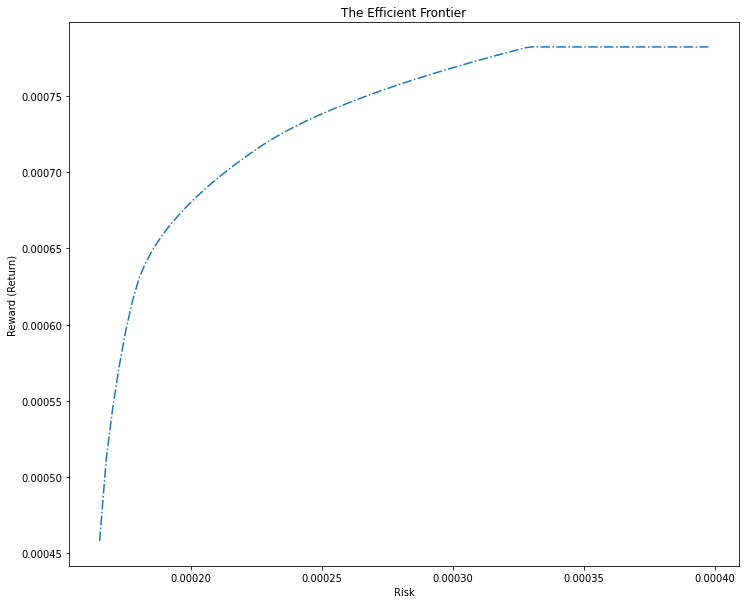

In [ ]:
# plot! pylab makes it easy
fig, ax = plt.subplots(figsize = (12,10))
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

In [ ]:
param_analysis.head(20)

,XOM,CVX,SLB,BLK,LNC,C,GOLD,NEM,PPG
0.000165,0.125131,0.000002,6.965265e-07,0.212268,4.069973e-07,0.000002,0.140481,0.214072,0.308043
0.000168,0.076746,0.000002,4.342430e-07,0.252207,2.872343e-07,0.000001,0.108456,0.248162,0.314426
0.000170,0.045657,0.000012,1.560797e-06,0.277858,1.079532e-06,0.000005,0.087886,0.270058,0.318520
0.000173,0.020821,0.000003,5.936374e-07,0.298368,4.454942e-07,0.000002,0.071440,0.287564,0.321800
0.000175,0.000347,0.000011,1.785918e-06,0.316233,1.411918e-06,0.000005,0.056107,0.303542,0.323751
0.000178,0.000023,0.000010,1.810081e-06,0.336298,1.669162e-06,0.000005,0.019466,0.335546,0.308649
0.000180,0.000007,0.000008,1.821032e-06,0.366872,1.993681e-06,0.000005,0.000036,0.348728,0.284341
0.000183,0.000006,0.000007,1.830506e-06,0.408199,2.331521e-06,0.000004,0.000016,0.340962,0.250802
0.000185,0.000005,0.000007,1.834980e-06,0.440423,2.531738e-06,0.000004,0.000013,0.334895,0.224650
0.000188,0.000002,0.000002,6.603424e-07,0.467769,9.621190e-07,0.000002,0.000004,0.329753,0.202466


# Stock Allocation
As we can see from the Stock allocation graph, we can select three stocks out of 9, starting from a risk level of 0.000183 up to 0.000223, after which the portfolio allocation goes down to two stocks.
We will select the stocks at a risk level of 0.000203, at which we get a portfolio allocation of the following three stocks - BLK, NEM and PPG

The weights of the stocks in our portfolio is obtained through the output of our model.

## BLK - 58.7% | NEM - 30.7% | PPG - 10.6%

# Momentum Trading
The pairs of moving average is applied with 9 days, 21 day; 10 days, 25 days; 13 days and 27 days; 19 days and 29 days; 20 days and 35 days
Note that the dataset is compiled with 5 pairs of moving average.

### 1. Download data: 
* Many services for this; some paid, some free 
* Yahoo Finance API
* Typically trading "systems" involve a number of securities
* For this demonstration we are just going to look at APPL 

In [ ]:
# you may need to restart your runtime
# https://stackoverflow.com/questions/68230237/python-pandas-datareader-and-yahoo-error-remotedataerror-unable-to-read-url
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Still need to import packages here to prevent errors occuring
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime

# NEM

In [ ]:
myStock = 'NEM'
gld = pdr.get_data_yahoo(myStock, start=datetime(2017, 1, 1), end=datetime(2021, 12, 31))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,Day,Open,High,Low,Close
Date,,,,,
2017-01-03,1,34.119999,35.000000,33.950001,34.630001
2017-01-04,2,34.900002,34.990002,34.189999,34.959999
2017-01-05,3,35.599998,37.250000,35.590000,36.570000
2017-01-06,4,36.000000,36.490002,34.990002,35.419998
2017-01-09,5,36.080002,36.160000,35.209999,35.360001


In [ ]:
# shows the different data types
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1259 non-null   int64  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
# compute summary statistics of each column
gld.describe()

,Day,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,45.297474,45.874790,44.718205,45.303209
std,363.586303,12.452877,12.626335,12.240591,12.437019
min,1.000000,29.360001,29.830000,29.059999,29.600000
25%,315.500000,35.529999,36.005001,35.045000,35.555000
50%,630.000000,38.889999,39.290001,38.439999,38.849998
75%,944.500000,58.404999,59.169998,57.664999,58.470001
max,1259.000000,74.250000,75.309998,73.489998,74.379997


### 2. Add data/transform data
* Calculate a signal based on some price or statistical action
* We are going to try a moving average crossover to generate signals (when two moving averages cross each other)

## Add moving averages to the data frame

In [ ]:
# rolled back (no data leakage) 
# since this cell is run after, this overwrites the previous data leakage
# you can comment out the cell above and run all if you are nervous!
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()
gld['10-day'] = gld['Close'].rolling(10).mean().shift()
gld['25-day'] = gld['Close'].rolling(25).mean().shift()
gld['13-day'] = gld['Close'].rolling(13).mean().shift()
gld['27-day'] = gld['Close'].rolling(27).mean().shift()
gld['19-day'] = gld['Close'].rolling(19).mean().shift()
gld['29-day'] = gld['Close'].rolling(29).mean().shift()
gld['20-day'] = gld['Close'].rolling(20).mean().shift()
gld['35-day'] = gld['Close'].rolling(35).mean().shift()
gld.dropna(inplace=True)
gld.head(n=5)

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,27-day,19-day,29-day,20-day,35-day
Date,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222,36.3484,37.249230,36.236296,36.663684,36.111034,36.5780,35.978286
2017-02-24,37,36.310001,36.900002,35.950001,36.080002,37.003333,36.543809,37.023,36.3724,37.180000,36.285555,36.751579,36.162414,36.6235,36.013428
2017-02-27,38,35.880001,36.240002,33.779999,33.970001,36.828889,36.597619,36.911,36.4184,37.036923,36.320370,36.841052,36.217931,36.7180,36.045428
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543,36.3756,36.779231,36.272593,36.788421,36.198621,36.6975,35.971143
2017-03-01,40,33.740002,34.709999,33.349998,34.419998,36.133333,36.580476,36.229,36.3100,36.501539,36.247037,36.681053,36.167586,36.6610,35.937429


## Visualize what the moving averages look like
See where the lines first cross - the 9 day price is dipping below the 21 day price - this means it's time to sell!

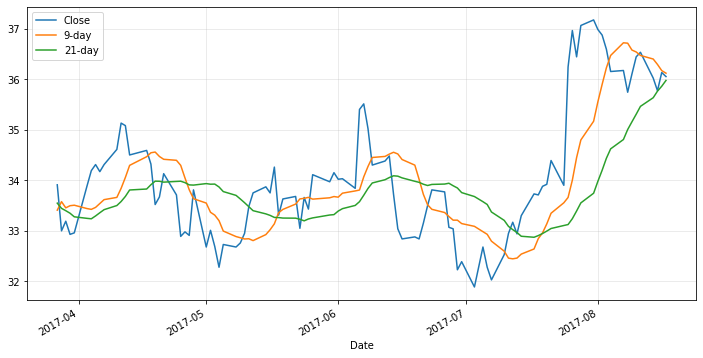

In [ ]:
# imagine where you would put markers on the plot 
# for buy vs. sell...

# the 22:123 shows the first 100 days of trading
gld.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

## Develop a trading strategy based on moving averages
* When the 9-day price is less than the 21-day price, sell the stock!
* When the 21-day price is less than the 9-day price, buy the stock!
* The transactions take place when the trend "shifts" (i.e., **only** when the plots cross)

## Momentum trading strategy



### Add "invested" column  
The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, **invested = 1 if the 9-day average is greater than the 21-day average**. 

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
gld['invested_1'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['invested_2'] = np.where(gld['10-day'] > gld['25-day'], 1, 0)
gld['invested_3'] = np.where(gld['13-day'] > gld['27-day'], 1, 0)
gld['invested_4'] = np.where(gld['19-day'] > gld['29-day'], 1, 0)
gld['invested_5'] = np.where(gld['20-day'] > gld['35-day'], 1, 0)
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,27-day,19-day,29-day,20-day,35-day,invested_1,invested_2,invested_3,invested_4,invested_5
Date,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222,36.3484,37.249230,36.236296,36.663684,36.111034,36.5780,35.978286,1,1,1,1,1
2017-02-24,37,36.310001,36.900002,35.950001,36.080002,37.003333,36.543809,37.023,36.3724,37.180000,36.285555,36.751579,36.162414,36.6235,36.013428,1,1,1,1,1
2017-02-27,38,35.880001,36.240002,33.779999,33.970001,36.828889,36.597619,36.911,36.4184,37.036923,36.320370,36.841052,36.217931,36.7180,36.045428,1,1,1,1,1
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543,36.3756,36.779231,36.272593,36.788421,36.198621,36.6975,35.971143,0,1,1,1,1
2017-03-01,40,33.740002,34.709999,33.349998,34.419998,36.133333,36.580476,36.229,36.3100,36.501539,36.247037,36.681053,36.167586,36.6610,35.937429,0,0,1,1,1


In [ ]:
print("This is count of invested 1:", gld['invested_1'].value_counts()) 
print("This is count of invested 2:", gld['invested_2'].value_counts()) 
print("This is count of invested 3:", gld['invested_3'].value_counts()) 
print("This is count of invested 4:", gld['invested_4'].value_counts()) 
print("This is count of invested 5:", gld['invested_5'].value_counts()) 

This is count of invested 1: 1    670
0    554
Name: invested_1, dtype: int64
This is count of invested 2: 1    644
0    580
Name: invested_2, dtype: int64
This is count of invested 3: 1    641
0    583
Name: invested_3, dtype: int64
This is count of invested 4: 1    660
0    564
Name: invested_4, dtype: int64
This is count of invested 5: 1    637
0    587
Name: invested_5, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
gld['signal_1'] = gld['invested_1'].diff()
gld['signal_2'] = gld['invested_2'].diff()
gld['signal_3'] = gld['invested_3'].diff()
gld['signal_4'] = gld['invested_4'].diff()
gld['signal_5'] = gld['invested_5'].diff()

### Add trading signals

In [ ]:
gld.head() # check your work

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222,36.3484,37.249230,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2017-02-24,37,36.310001,36.900002,35.950001,36.080002,37.003333,36.543809,37.023,36.3724,37.180000,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-27,38,35.880001,36.240002,33.779999,33.970001,36.828889,36.597619,36.911,36.4184,37.036923,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543,36.3756,36.779231,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-03-01,40,33.740002,34.709999,33.349998,34.419998,36.133333,36.580476,36.229,36.3100,36.501539,...,0,0,1,1,1,0.0,-1.0,0.0,0.0,0.0


Let's set signal for first day to 1, i.e., we want to buy on the first trading day:

In [ ]:
gld.loc["2017-02-23",'signal_1'] = 1.0
gld.loc["2017-02-23",'signal_2'] = 1.0
gld.loc["2017-02-23",'signal_3'] = 1.0
gld.loc["2017-02-23",'signal_4'] = 1.0
gld.loc["2017-02-23",'signal_5'] = 1.0
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222,36.3484,37.249230,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2017-02-24,37,36.310001,36.900002,35.950001,36.080002,37.003333,36.543809,37.023,36.3724,37.180000,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-27,38,35.880001,36.240002,33.779999,33.970001,36.828889,36.597619,36.911,36.4184,37.036923,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543,36.3756,36.779231,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-03-01,40,33.740002,34.709999,33.349998,34.419998,36.133333,36.580476,36.229,36.3100,36.501539,...,0,0,1,1,1,0.0,-1.0,0.0,0.0,0.0


In [ ]:
gld[gld['signal_1'].isin([1,-1])]  ## Let's see the trading days

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222000,36.3484,37.249230,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543000,36.3756,36.779231,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-03-28,59,34.000000,34.209999,32.639999,33.000000,33.576667,33.444285,33.459000,33.9084,33.319231,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2017-04-27,80,32.799999,33.130001,32.419998,32.910000,33.812222,33.908571,33.939000,33.8772,34.110769,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-05-18,95,34.020000,34.119999,33.250000,33.310001,33.358888,33.262381,33.250999,33.4800,33.145384,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-15,1206,56.570000,57.279999,56.000000,57.029999,55.007778,54.612381,54.863000,55.0320,54.709231,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2021-11-05,1221,55.119999,56.419998,55.009998,56.360001,55.672222,55.973333,55.866000,55.6812,56.153077,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2021-11-15,1227,58.799999,59.209999,58.500000,58.970001,56.636666,56.592857,56.402999,56.4628,56.191538,...,1,0,0,1,1,1.0,0.0,0.0,0.0,0.0


## Buy and Hold strategy

### Calculating returns

We want to calculate the returns using `.diff()`, so we need to take the log of the close values. `gld['return']` will be the **'buy and hold' return** (i.e., we will buy in the first day and sell in the last day, regardless of what's happening in the market). And later, we will make a variable for our system, the momentum trading algorithm!

In [ ]:
gld['logClose'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return'] = gld['logClose'].diff() # the difference will be positive or negative
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5,logClose,return
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222,36.3484,37.249230,...,1,1,1,1.0,1.0,1.0,1.0,1.0,3.579622,NaN
2017-02-24,37,36.310001,36.900002,35.950001,36.080002,37.003333,36.543809,37.023,36.3724,37.180000,...,1,1,1,0.0,0.0,0.0,0.0,0.0,3.585739,0.006116
2017-02-27,38,35.880001,36.240002,33.779999,33.970001,36.828889,36.597619,36.911,36.4184,37.036923,...,1,1,1,0.0,0.0,0.0,0.0,0.0,3.525478,-0.060261
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543,36.3756,36.779231,...,1,1,1,-1.0,0.0,0.0,0.0,0.0,3.533395,0.007917
2017-03-01,40,33.740002,34.709999,33.349998,34.419998,36.133333,36.580476,36.229,36.3100,36.501539,...,1,1,1,0.0,-1.0,0.0,0.0,0.0,3.538638,0.005243


In this case, instead of deleting the first row, we prefer to set a return of 0, so let's do that.

In [ ]:
gld.loc["2017-02-23",'return'] = 0.0
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5,logClose,return
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222,36.3484,37.249230,...,1,1,1,1.0,1.0,1.0,1.0,1.0,3.579622,0.000000
2017-02-24,37,36.310001,36.900002,35.950001,36.080002,37.003333,36.543809,37.023,36.3724,37.180000,...,1,1,1,0.0,0.0,0.0,0.0,0.0,3.585739,0.006116
2017-02-27,38,35.880001,36.240002,33.779999,33.970001,36.828889,36.597619,36.911,36.4184,37.036923,...,1,1,1,0.0,0.0,0.0,0.0,0.0,3.525478,-0.060261
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543,36.3756,36.779231,...,1,1,1,-1.0,0.0,0.0,0.0,0.0,3.533395,0.007917
2017-03-01,40,33.740002,34.709999,33.349998,34.419998,36.133333,36.580476,36.229,36.3100,36.501539,...,1,1,1,0.0,-1.0,0.0,0.0,0.0,3.538638,0.005243


Finally, what is the return of the buy&hold strategy?

In [ ]:
bh_nem= np.exp(np.sum(gld['return'])) -1
bh_nem

0.7295036085376023

## System return

Let's see now how much money this is strategy is making (or losing!!!). Note that our investment will only change when we are invested.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
gld['system_return_1'] = gld['invested_1'] * gld['return']
gld['system_return_2'] = gld['invested_2'] * gld['return']
gld['system_return_3'] = gld['invested_3'] * gld['return']
gld['system_return_4'] = gld['invested_4'] * gld['return']
gld['system_return_5'] = gld['invested_5'] * gld['return']
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,signal_3,signal_4,signal_5,logClose,return,system_return_1,system_return_2,system_return_3,system_return_4,system_return_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,36.500000,36.990002,35.830002,35.860001,37.152222,36.552381,37.222,36.3484,37.249230,...,1.0,1.0,1.0,3.579622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-24,37,36.310001,36.900002,35.950001,36.080002,37.003333,36.543809,37.023,36.3724,37.180000,...,0.0,0.0,0.0,3.585739,0.006116,0.006116,0.006116,0.006116,0.006116,0.006116
2017-02-27,38,35.880001,36.240002,33.779999,33.970001,36.828889,36.597619,36.911,36.4184,37.036923,...,0.0,0.0,0.0,3.525478,-0.060261,-0.060261,-0.060261,-0.060261,-0.060261,-0.060261
2017-02-28,39,34.450001,35.009998,34.009998,34.240002,36.450000,36.587143,36.543,36.3756,36.779231,...,0.0,0.0,0.0,3.533395,0.007917,0.000000,0.007917,0.007917,0.007917,0.007917
2017-03-01,40,33.740002,34.709999,33.349998,34.419998,36.133333,36.580476,36.229,36.3100,36.501539,...,0.0,0.0,0.0,3.538638,0.005243,0.000000,0.000000,0.005243,0.005243,0.005243


### NEM Momentum Trading Return

In [ ]:
NEM1= np.exp(np.sum(gld['system_return_1'])) -1
NEM2= np.exp(np.sum(gld['system_return_2'])) -1
NEM3=np.exp(np.sum(gld['system_return_3'])) -1
NEM4=np.exp(np.sum(gld['system_return_4'])) -1
NEM5=np.exp(np.sum(gld['system_return_5'])) -1
print("NEM Pair1:",NEM1)
print("NEM Pair2:",NEM2)
print("NEM Pair3:",NEM3)
print("NEM Pair4:",NEM4)
print("NEM Pair5:",NEM5)

NEM Pair1: -0.05950320478141169
NEM Pair2: 0.06111147458606192
NEM Pair3: 0.058480609914631554
NEM Pair4: -0.3500333313354822
NEM Pair5: -0.22386304660627765


### NEM buy&hold strategy

In [ ]:
np.exp(np.sum(gld['return'])) -1

0.7295036085376023

#BLK

In [ ]:
myStock = 'BLK'
gld = pdr.get_data_yahoo(myStock, start=datetime(2017, 1, 1), end=datetime(2021, 12, 31))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,Day,Open,High,Low,Close
Date,,,,,
2017-01-03,1,384.619995,387.950012,382.279999,386.429993
2017-01-04,2,384.649994,386.970001,383.160004,386.660004
2017-01-05,3,384.980011,386.700012,380.079987,382.540009
2017-01-06,4,383.570007,385.470001,381.429993,384.299988
2017-01-09,5,384.350006,385.429993,380.010010,380.420013


In [ ]:
# shows the different data types
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1259 non-null   int64  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
# compute summary statistics of each column
gld.describe()

,Day,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,554.160000,559.310858,548.662789,554.076163
std,363.586303,164.929880,166.080475,163.605899,164.820100
min,1.000000,349.299988,354.720001,323.980011,327.420013
25%,315.500000,430.114990,434.054993,426.250000,430.169998
50%,630.000000,498.940002,503.260010,493.459991,498.779999
75%,944.500000,595.049988,601.165009,590.190002,594.584991
max,1259.000000,971.520020,973.159973,962.309998,971.489990


### 2. Add data/transform data
* Calculate a signal based on some price or statistical action
* We are going to try a moving average crossover to generate signals (when two moving averages cross each other)

## Add moving averages to the data frame

In [ ]:
# rolled back (no data leakage) 
# since this cell is run after, this overwrites the previous data leakage
# you can comment out the cell above and run all if you are nervous!
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()
gld['10-day'] = gld['Close'].rolling(10).mean().shift()
gld['25-day'] = gld['Close'].rolling(25).mean().shift()
gld['13-day'] = gld['Close'].rolling(13).mean().shift()
gld['27-day'] = gld['Close'].rolling(27).mean().shift()
gld['19-day'] = gld['Close'].rolling(19).mean().shift()
gld['29-day'] = gld['Close'].rolling(29).mean().shift()
gld['20-day'] = gld['Close'].rolling(20).mean().shift()
gld['35-day'] = gld['Close'].rolling(35).mean().shift()
gld.dropna(inplace=True)
gld.head(n=10)

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,27-day,19-day,29-day,20-day,35-day
Date,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,380.765558,381.157900,380.686555,381.516504,381.159146
2017-02-24,37,388.029999,389.160004,385.730011,389.160004,388.765557,381.949527,387.746002,381.565203,385.102311,381.182595,381.746845,381.019658,381.630504,381.278574
2017-02-27,38,389.549988,391.369995,388.220001,391.000000,389.462223,381.989051,388.805002,382.037603,386.005388,381.714447,382.488951,381.394485,382.117503,381.350003
2017-02-28,39,389.040009,391.079987,386.920013,387.459991,390.036669,382.540479,389.616000,382.421603,387.090771,382.195929,383.321583,381.796209,382.914503,381.591717
2017-03-01,40,394.250000,399.170013,392.790009,397.809998,390.312222,383.130955,389.779001,382.797603,388.083078,382.570372,384.031056,382.232761,383.528503,381.682002
2017-03-02,41,395.149994,395.380005,391.420013,391.649994,390.842221,384.208575,391.062000,383.454802,389.563077,383.178150,385.336845,382.915864,384.720003,382.178859
2017-03-03,42,392.029999,392.929993,389.420013,390.170013,390.806664,385.050002,390.922998,383.587603,390.236922,383.681484,386.390002,383.408967,385.652502,382.502859
2017-03-06,43,387.720001,388.940002,385.760010,387.660004,390.963331,385.867622,390.742999,384.017603,390.570770,384.007039,387.030529,383.711382,386.579002,382.766288
2017-03-07,44,387.059998,387.649994,384.200012,385.350006,390.692220,386.630479,390.632999,384.521603,390.776924,383.982225,387.569476,384.042416,387.062003,383.034002


## Visualize what the moving averages look like
See where the lines first cross - the 9 day price is dipping below the 21 day price - this means it's time to sell!

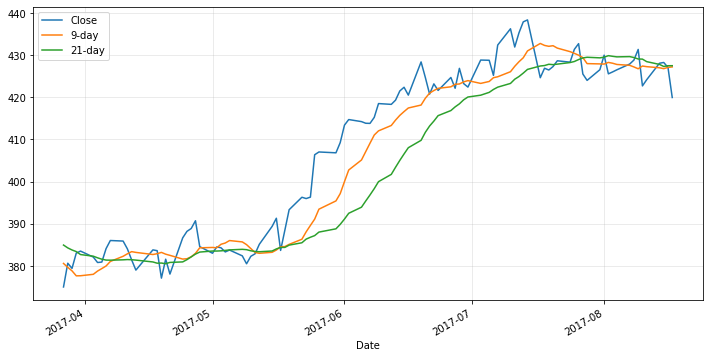

In [ ]:
# imagine where you would put markers on the plot 
# for buy vs. sell...

# the 22:123 shows the first 100 days of trading
gld.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

## Develop a trading strategy based on moving averages
* When the 9-day price is less than the 21-day price, sell the stock!
* When the 21-day price is less than the 9-day price, buy the stock!
* The transactions take place when the trend "shifts" (i.e., **only** when the plots cross)

## Momentum trading strategy



### Add "invested" column  
The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, **invested = 1 if the 9-day average is greater than the 21-day average**. 

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
gld['invested_1'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['invested_2'] = np.where(gld['10-day'] > gld['25-day'], 1, 0)
gld['invested_3'] = np.where(gld['13-day'] > gld['27-day'], 1, 0)
gld['invested_4'] = np.where(gld['19-day'] > gld['29-day'], 1, 0)
gld['invested_5'] = np.where(gld['20-day'] > gld['35-day'], 1, 0)
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,27-day,19-day,29-day,20-day,35-day,invested_1,invested_2,invested_3,invested_4,invested_5
Date,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,380.765558,381.157900,380.686555,381.516504,381.159146,1,1,1,1,1
2017-02-24,37,388.029999,389.160004,385.730011,389.160004,388.765557,381.949527,387.746002,381.565203,385.102311,381.182595,381.746845,381.019658,381.630504,381.278574,1,1,1,1,1
2017-02-27,38,389.549988,391.369995,388.220001,391.000000,389.462223,381.989051,388.805002,382.037603,386.005388,381.714447,382.488951,381.394485,382.117503,381.350003,1,1,1,1,1
2017-02-28,39,389.040009,391.079987,386.920013,387.459991,390.036669,382.540479,389.616000,382.421603,387.090771,382.195929,383.321583,381.796209,382.914503,381.591717,1,1,1,1,1
2017-03-01,40,394.250000,399.170013,392.790009,397.809998,390.312222,383.130955,389.779001,382.797603,388.083078,382.570372,384.031056,382.232761,383.528503,381.682002,1,1,1,1,1


In [ ]:
print("This is count of invested 1:", gld['invested_1'].value_counts()) 
print("This is count of invested 2:", gld['invested_2'].value_counts()) 
print("This is count of invested 3:", gld['invested_3'].value_counts()) 
print("This is count of invested 4:", gld['invested_4'].value_counts()) 
print("This is count of invested 5:", gld['invested_5'].value_counts()) 

This is count of invested 1: 1    772
0    452
Name: invested_1, dtype: int64
This is count of invested 2: 1    779
0    445
Name: invested_2, dtype: int64
This is count of invested 3: 1    777
0    447
Name: invested_3, dtype: int64
This is count of invested 4: 1    777
0    447
Name: invested_4, dtype: int64
This is count of invested 5: 1    791
0    433
Name: invested_5, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
gld['signal_1'] = gld['invested_1'].diff()
gld['signal_2'] = gld['invested_2'].diff()
gld['signal_3'] = gld['invested_3'].diff()
gld['signal_4'] = gld['invested_4'].diff()
gld['signal_5'] = gld['invested_5'].diff()

### Add trading signals

In [ ]:
gld.head() # check your work

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2017-02-24,37,388.029999,389.160004,385.730011,389.160004,388.765557,381.949527,387.746002,381.565203,385.102311,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-27,38,389.549988,391.369995,388.220001,391.000000,389.462223,381.989051,388.805002,382.037603,386.005388,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-28,39,389.040009,391.079987,386.920013,387.459991,390.036669,382.540479,389.616000,382.421603,387.090771,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-03-01,40,394.250000,399.170013,392.790009,397.809998,390.312222,383.130955,389.779001,382.797603,388.083078,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0


Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:

In [ ]:
gld.loc["2017-02-23",'signal_1'] = 1.0
gld.loc["2017-02-23",'signal_2'] = 1.0
gld.loc["2017-02-23",'signal_3'] = 1.0
gld.loc["2017-02-23",'signal_4'] = 1.0
gld.loc["2017-02-23",'signal_5'] = 1.0
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2017-02-24,37,388.029999,389.160004,385.730011,389.160004,388.765557,381.949527,387.746002,381.565203,385.102311,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-27,38,389.549988,391.369995,388.220001,391.000000,389.462223,381.989051,388.805002,382.037603,386.005388,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-28,39,389.040009,391.079987,386.920013,387.459991,390.036669,382.540479,389.616000,382.421603,387.090771,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-03-01,40,394.250000,399.170013,392.790009,397.809998,390.312222,383.130955,389.779001,382.797603,388.083078,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0


In [ ]:
gld[gld['signal_1'].isin([1,-1])]  ## Let's see the trading days

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2017-03-14,49,383.190002,386.089996,381.339996,383.290009,387.881110,388.449524,387.838998,386.595201,388.396921,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-04-10,68,386.079987,389.029999,384.140015,385.890015,382.278890,381.439526,381.551001,382.082401,380.060770,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2017-05-11,90,380.399994,383.350006,378.559998,382.869995,383.175557,383.411903,383.929001,383.542799,384.846154,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-05-17,94,391.299988,391.299988,381.649994,383.670013,384.541107,384.381426,384.515997,384.011997,384.402306,...,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0
2017-07-28,144,425.000000,426.089996,421.899994,424.000000,427.976668,429.481429,429.013000,428.428801,430.400771,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-09-14,177,425.790009,427.000000,424.429993,425.690002,419.440002,418.979049,419.116003,420.192401,418.153849,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2017-11-06,214,478.750000,479.790009,475.049988,475.609985,473.102224,473.233333,473.231003,470.439200,474.093849,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-11-24,227,481.130005,482.920013,479.339996,479.739990,472.774438,472.711902,472.156995,473.138799,472.519226,...,1,0,0,0,1,1.0,0.0,0.0,0.0,0.0


## Buy and Hold strategy

### Calculating returns

We want to calculate the returns using `.diff()`, so we need to take the log of the close values. `gld['return']` will be the **'buy and hold' return** (i.e., we will buy in the first day and sell in the last day, regardless of what's happening in the market). And later, we will make a variable for our system, the momentum trading algorithm!

In [ ]:
gld['logClose'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return'] = gld['logClose'].diff() # the difference will be positive or negative
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5,logClose,return
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,...,1,1,1,1.0,1.0,1.0,1.0,1.0,5.967710,NaN
2017-02-24,37,388.029999,389.160004,385.730011,389.160004,388.765557,381.949527,387.746002,381.565203,385.102311,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.963991,-0.003719
2017-02-27,38,389.549988,391.369995,388.220001,391.000000,389.462223,381.989051,388.805002,382.037603,386.005388,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.968708,0.004717
2017-02-28,39,389.040009,391.079987,386.920013,387.459991,390.036669,382.540479,389.616000,382.421603,387.090771,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.959613,-0.009095
2017-03-01,40,394.250000,399.170013,392.790009,397.809998,390.312222,383.130955,389.779001,382.797603,388.083078,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.985974,0.026362


In this case, instead of deleting the first row, I prefer to set a return of 0, so let's do that.

In [ ]:
gld.loc["2017-02-23",'return'] = 0.0
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5,logClose,return
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,...,1,1,1,1.0,1.0,1.0,1.0,1.0,5.967710,0.000000
2017-02-24,37,388.029999,389.160004,385.730011,389.160004,388.765557,381.949527,387.746002,381.565203,385.102311,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.963991,-0.003719
2017-02-27,38,389.549988,391.369995,388.220001,391.000000,389.462223,381.989051,388.805002,382.037603,386.005388,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.968708,0.004717
2017-02-28,39,389.040009,391.079987,386.920013,387.459991,390.036669,382.540479,389.616000,382.421603,387.090771,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.959613,-0.009095
2017-03-01,40,394.250000,399.170013,392.790009,397.809998,390.312222,383.130955,389.779001,382.797603,388.083078,...,1,1,1,0.0,0.0,0.0,0.0,0.0,5.985974,0.026362


Finally, what is the return of the buy&hold strategy?

In [ ]:
bh_blk= np.exp(np.sum(gld['return'])) -1
bh_blk

1.3439236883167704

## System return

Let's see now how much money this is strategy is making (or losing!!!). Note that our investment will only change when we are invested.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
gld['system_return_1'] = gld['invested_1'] * gld['return']
gld['system_return_2'] = gld['invested_2'] * gld['return']
gld['system_return_3'] = gld['invested_3'] * gld['return']
gld['system_return_4'] = gld['invested_4'] * gld['return']
gld['system_return_5'] = gld['invested_5'] * gld['return']
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,signal_3,signal_4,signal_5,logClose,return,system_return_1,system_return_2,system_return_3,system_return_4,system_return_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,391.470001,391.769989,388.000000,390.609985,387.427782,381.510004,386.141003,381.060803,384.132312,...,1.0,1.0,1.0,5.967710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-24,37,388.029999,389.160004,385.730011,389.160004,388.765557,381.949527,387.746002,381.565203,385.102311,...,0.0,0.0,0.0,5.963991,-0.003719,-0.003719,-0.003719,-0.003719,-0.003719,-0.003719
2017-02-27,38,389.549988,391.369995,388.220001,391.000000,389.462223,381.989051,388.805002,382.037603,386.005388,...,0.0,0.0,0.0,5.968708,0.004717,0.004717,0.004717,0.004717,0.004717,0.004717
2017-02-28,39,389.040009,391.079987,386.920013,387.459991,390.036669,382.540479,389.616000,382.421603,387.090771,...,0.0,0.0,0.0,5.959613,-0.009095,-0.009095,-0.009095,-0.009095,-0.009095,-0.009095
2017-03-01,40,394.250000,399.170013,392.790009,397.809998,390.312222,383.130955,389.779001,382.797603,388.083078,...,0.0,0.0,0.0,5.985974,0.026362,0.026362,0.026362,0.026362,0.026362,0.026362


### BLK Momentum Trading Return

In [ ]:
BLK1= np.exp(np.sum(gld['system_return_1'])) -1
BLK2= np.exp(np.sum(gld['system_return_2'])) -1
BLK3=np.exp(np.sum(gld['system_return_3'])) -1
BLK4=np.exp(np.sum(gld['system_return_4'])) -1
BLK5=np.exp(np.sum(gld['system_return_5'])) -1
print("BLK Pair1:",BLK1)
print("BLK Pair2:",BLK2)
print("BLK Pair3:",BLK3)
print("BLK Pair4:",BLK4)
print("BLK Pair5:",BLK5)

BLK Pair1: 0.8630194306488674
BLK Pair2: 1.072838956289075
BLK Pair3: 0.9077342353004563
BLK Pair4: 0.5030602971052234
BLK Pair5: 0.4583356911421408


### BLK buy&hold strategy

In [ ]:
np.exp(np.sum(gld['return'])) -1

1.3439236883167704

# PPG

In [ ]:
myStock = 'PPG'
gld = pdr.get_data_yahoo(myStock, start=datetime(2017, 1, 1), end=datetime(2021, 12, 31))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,Day,Open,High,Low,Close
Date,,,,,
2017-01-03,1,95.430000,95.970001,94.570000,95.250000
2017-01-04,2,95.709999,97.519997,95.629997,97.269997
2017-01-05,3,96.459999,96.620003,95.400002,95.620003
2017-01-06,4,95.769997,96.139999,95.290001,95.589996
2017-01-09,5,95.050003,96.459999,94.769997,96.349998


In [ ]:
# shows the different data types
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-01-03 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     1259 non-null   int64  
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [ ]:
# compute summary statistics of each column
gld.describe()

,Day,Open,High,Low,Close
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,630.000000,121.458412,122.577863,120.298149,121.464329
std,363.586303,22.323751,22.426110,22.183114,22.298380
min,1.000000,72.209999,78.830002,69.769997,72.500000
25%,315.500000,106.259998,107.185001,105.175003,106.365002
50%,630.000000,114.000000,115.099998,113.260002,114.129997
75%,944.500000,132.880005,133.610001,132.029999,132.949997
max,1259.000000,182.850006,182.970001,180.720001,182.330002


### 2. Add data/transform data
* Calculate a signal based on some price or statistical action
* We are going to try a moving average crossover to generate signals (when two moving averages cross each other)

## Add moving averages to the data frame

In [ ]:
# rolled back (no data leakage) 
# since this cell is run after, this overwrites the previous data leakage
# you can comment out the cell above and run all if you are nervous!
gld['9-day'] = gld['Close'].rolling(9).mean().shift()
gld['21-day'] = gld['Close'].rolling(21).mean().shift()
gld['10-day'] = gld['Close'].rolling(10).mean().shift()
gld['25-day'] = gld['Close'].rolling(25).mean().shift()
gld['13-day'] = gld['Close'].rolling(13).mean().shift()
gld['27-day'] = gld['Close'].rolling(27).mean().shift()
gld['19-day'] = gld['Close'].rolling(19).mean().shift()
gld['29-day'] = gld['Close'].rolling(29).mean().shift()
gld['20-day'] = gld['Close'].rolling(20).mean().shift()
gld['35-day'] = gld['Close'].rolling(35).mean().shift()
gld.dropna(inplace=True)
gld.head(n=10)

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,27-day,19-day,29-day,20-day,35-day
Date,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,100.411852,101.185263,100.159310,101.180000,99.459714
2017-02-24,37,102.129997,103.370003,101.930000,103.309998,101.885555,101.247619,101.709999,100.989600,101.317692,100.644444,101.224736,100.365172,101.255999,99.669714
2017-02-27,38,103.080002,103.400002,102.260002,102.449997,102.193332,101.353809,102.027999,101.222000,101.578461,100.916296,101.292631,100.587241,101.328999,99.842285
2017-02-28,39,102.320000,102.760002,101.959999,102.430000,102.375554,101.382380,102.218999,101.359999,101.766153,101.129629,101.314736,100.798620,101.350499,100.037428
2017-03-01,40,103.449997,103.820000,103.050003,103.290001,102.471110,101.401904,102.380999,101.447599,101.945384,101.312222,101.442105,101.021379,101.370499,100.232857
2017-03-02,41,103.300003,103.300003,102.300003,102.379997,102.669999,101.461904,102.552999,101.507199,102.188461,101.471111,101.585789,101.248965,101.534499,100.431143
2017-03-03,42,102.430000,103.169998,101.680000,102.059998,102.737777,101.574761,102.640999,101.559199,102.329999,101.550370,101.680526,101.417241,101.625499,100.602285
2017-03-06,43,101.949997,101.959999,100.959999,101.199997,102.703332,101.646190,102.669999,101.567599,102.426153,101.559999,101.739473,101.522758,101.699499,100.757428
2017-03-07,44,101.139999,101.250000,100.669998,100.779999,102.503332,101.675713,102.552998,101.534799,102.397691,101.564444,101.806841,101.555861,101.712499,100.881142


## Visualize what the moving averages look like
See where the lines first cross - the 9 day price is dipping below the 21 day price - this means it's time to sell!

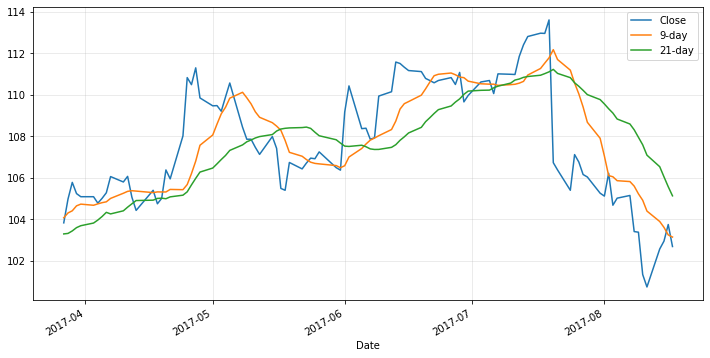

In [ ]:
# imagine where you would put markers on the plot 
# for buy vs. sell...

# the 22:123 shows the first 100 days of trading
gld.iloc[22:123,[4,5,6]].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
plt.show()

## Develop a trading strategy based on moving averages
* When the 9-day price is less than the 21-day price, sell the stock!
* When the 21-day price is less than the 9-day price, buy the stock!
* The transactions take place when the trend "shifts" (i.e., **only** when the plots cross)

## Momentum trading strategy



### Add "invested" column  
The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, **invested = 1 if the 9-day average is greater than the 21-day average**. 

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
gld['invested_1'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['invested_2'] = np.where(gld['10-day'] > gld['25-day'], 1, 0)
gld['invested_3'] = np.where(gld['13-day'] > gld['27-day'], 1, 0)
gld['invested_4'] = np.where(gld['19-day'] > gld['29-day'], 1, 0)
gld['invested_5'] = np.where(gld['20-day'] > gld['35-day'], 1, 0)
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,27-day,19-day,29-day,20-day,35-day,invested_1,invested_2,invested_3,invested_4,invested_5
Date,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,100.411852,101.185263,100.159310,101.180000,99.459714,1,1,1,1,1
2017-02-24,37,102.129997,103.370003,101.930000,103.309998,101.885555,101.247619,101.709999,100.989600,101.317692,100.644444,101.224736,100.365172,101.255999,99.669714,1,1,1,1,1
2017-02-27,38,103.080002,103.400002,102.260002,102.449997,102.193332,101.353809,102.027999,101.222000,101.578461,100.916296,101.292631,100.587241,101.328999,99.842285,1,1,1,1,1
2017-02-28,39,102.320000,102.760002,101.959999,102.430000,102.375554,101.382380,102.218999,101.359999,101.766153,101.129629,101.314736,100.798620,101.350499,100.037428,1,1,1,1,1
2017-03-01,40,103.449997,103.820000,103.050003,103.290001,102.471110,101.401904,102.380999,101.447599,101.945384,101.312222,101.442105,101.021379,101.370499,100.232857,1,1,1,1,1


In [ ]:
print("This is count of invested 1:", gld['invested_1'].value_counts()) 
print("This is count of invested 2:", gld['invested_2'].value_counts()) 
print("This is count of invested 3:", gld['invested_3'].value_counts()) 
print("This is count of invested 4:", gld['invested_4'].value_counts()) 
print("This is count of invested 5:", gld['invested_5'].value_counts()) 

This is count of invested 1: 1    714
0    510
Name: invested_1, dtype: int64
This is count of invested 2: 1    728
0    496
Name: invested_2, dtype: int64
This is count of invested 3: 1    735
0    489
Name: invested_3, dtype: int64
This is count of invested 4: 1    731
0    493
Name: invested_4, dtype: int64
This is count of invested 5: 1    758
0    466
Name: invested_5, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
gld['signal_1'] = gld['invested_1'].diff()
gld['signal_2'] = gld['invested_2'].diff()
gld['signal_3'] = gld['invested_3'].diff()
gld['signal_4'] = gld['invested_4'].diff()
gld['signal_5'] = gld['invested_5'].diff()

### Add trading signals



In [ ]:
gld.head() # check your work

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2017-02-24,37,102.129997,103.370003,101.930000,103.309998,101.885555,101.247619,101.709999,100.989600,101.317692,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-27,38,103.080002,103.400002,102.260002,102.449997,102.193332,101.353809,102.027999,101.222000,101.578461,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-28,39,102.320000,102.760002,101.959999,102.430000,102.375554,101.382380,102.218999,101.359999,101.766153,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-03-01,40,103.449997,103.820000,103.050003,103.290001,102.471110,101.401904,102.380999,101.447599,101.945384,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0


Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:

In [ ]:
gld.loc["2017-02-23",'signal_1'] = 1.0
gld.loc["2017-02-23",'signal_2'] = 1.0
gld.loc["2017-02-23",'signal_3'] = 1.0
gld.loc["2017-02-23",'signal_4'] = 1.0
gld.loc["2017-02-23",'signal_5'] = 1.0
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2017-02-24,37,102.129997,103.370003,101.930000,103.309998,101.885555,101.247619,101.709999,100.989600,101.317692,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-27,38,103.080002,103.400002,102.260002,102.449997,102.193332,101.353809,102.027999,101.222000,101.578461,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-02-28,39,102.320000,102.760002,101.959999,102.430000,102.375554,101.382380,102.218999,101.359999,101.766153,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0
2017-03-01,40,103.449997,103.820000,103.050003,103.290001,102.471110,101.401904,102.380999,101.447599,101.945384,...,1,1,1,1,1,0.0,0.0,0.0,0.0,0.0


In [ ]:
gld[gld['signal_1'].isin([1,-1])]  ## Let's see the trading days

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_1,invested_2,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,...,1,1,1,1,1,1.0,1.0,1.0,1.0,1.0
2017-05-17,94,107.410004,107.410004,105.400002,105.480003,108.283334,108.341429,108.375000,107.844000,108.655384,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-06-06,107,107.860001,108.559998,107.650002,108.379997,107.618890,107.488096,107.499001,107.810800,107.122309,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2017-07-10,130,110.730003,111.400002,110.730003,110.980003,110.481111,110.556667,110.501000,110.268000,110.541539,...,0,1,1,1,1,-1.0,0.0,0.0,0.0,0.0
2017-07-14,134,112.639999,113.139999,112.320000,112.800003,110.943334,110.872381,110.814001,110.715200,110.809231,...,1,1,1,1,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12,1161,169.759995,170.619995,167.860001,170.389999,165.032223,164.799048,164.815001,165.727201,164.736924,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2021-08-26,1171,163.229996,163.270004,161.009995,161.149994,164.573332,164.907143,165.154999,164.662000,165.646153,...,0,1,1,1,0,-1.0,0.0,0.0,0.0,0.0
2021-10-13,1204,153.759995,155.039993,152.009995,154.679993,147.723333,147.590953,147.525999,148.421200,147.545384,...,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0


## Buy and Hold strategy

### Calculating returns

We want to calculate the returns using `.diff()`, so we need to take the log of the close values. `gld['return']` will be the **'buy and hold' return** (i.e., we will buy in the first day and sell in the last day, regardless of what's happening in the market). And later, we will make a variable for our system, the momentum trading algorithm!

In [ ]:
gld['logClose'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return'] = gld['logClose'].diff() # the difference will be positive or negative
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5,logClose,return
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,...,1,1,1,1.0,1.0,1.0,1.0,1.0,4.630838,NaN
2017-02-24,37,102.129997,103.370003,101.930000,103.309998,101.885555,101.247619,101.709999,100.989600,101.317692,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.637734,0.006896
2017-02-27,38,103.080002,103.400002,102.260002,102.449997,102.193332,101.353809,102.027999,101.222000,101.578461,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.629375,-0.008359
2017-02-28,39,102.320000,102.760002,101.959999,102.430000,102.375554,101.382380,102.218999,101.359999,101.766153,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.629180,-0.000195
2017-03-01,40,103.449997,103.820000,103.050003,103.290001,102.471110,101.401904,102.380999,101.447599,101.945384,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.637541,0.008361


In this case, instead of deleting the first row, I prefer to set a return of 0, so let's do that.

In [ ]:
gld.loc["2017-02-23",'return'] = 0.0
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,invested_3,invested_4,invested_5,signal_1,signal_2,signal_3,signal_4,signal_5,logClose,return
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,...,1,1,1,1.0,1.0,1.0,1.0,1.0,4.630838,0.000000
2017-02-24,37,102.129997,103.370003,101.930000,103.309998,101.885555,101.247619,101.709999,100.989600,101.317692,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.637734,0.006896
2017-02-27,38,103.080002,103.400002,102.260002,102.449997,102.193332,101.353809,102.027999,101.222000,101.578461,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.629375,-0.008359
2017-02-28,39,102.320000,102.760002,101.959999,102.430000,102.375554,101.382380,102.218999,101.359999,101.766153,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.629180,-0.000195
2017-03-01,40,103.449997,103.820000,103.050003,103.290001,102.471110,101.401904,102.380999,101.447599,101.945384,...,1,1,1,0.0,0.0,0.0,0.0,0.0,4.637541,0.008361


Finally, what is the return of the buy&hold strategy?

In [ ]:
bh_ppg=np.exp(np.sum(gld['return'])) -1
bh_ppg

0.6807018031769363

## System return

Let's see now how much money this is strategy is making (or losing!!!). Note that our investment will only change when we are invested.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!
gld['system_return_1'] = gld['invested_1'] * gld['return']
gld['system_return_2'] = gld['invested_2'] * gld['return']
gld['system_return_3'] = gld['invested_3'] * gld['return']
gld['system_return_4'] = gld['invested_4'] * gld['return']
gld['system_return_5'] = gld['invested_5'] * gld['return']
gld.head()

,Day,Open,High,Low,Close,9-day,21-day,10-day,25-day,13-day,...,signal_3,signal_4,signal_5,logClose,return,system_return_1,system_return_2,system_return_3,system_return_4,system_return_5
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-23,36,103.230003,103.230003,102.190002,102.599998,101.611110,101.209524,101.459999,100.753200,101.190000,...,1.0,1.0,1.0,4.630838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-02-24,37,102.129997,103.370003,101.930000,103.309998,101.885555,101.247619,101.709999,100.989600,101.317692,...,0.0,0.0,0.0,4.637734,0.006896,0.006896,0.006896,0.006896,0.006896,0.006896
2017-02-27,38,103.080002,103.400002,102.260002,102.449997,102.193332,101.353809,102.027999,101.222000,101.578461,...,0.0,0.0,0.0,4.629375,-0.008359,-0.008359,-0.008359,-0.008359,-0.008359,-0.008359
2017-02-28,39,102.320000,102.760002,101.959999,102.430000,102.375554,101.382380,102.218999,101.359999,101.766153,...,0.0,0.0,0.0,4.629180,-0.000195,-0.000195,-0.000195,-0.000195,-0.000195,-0.000195
2017-03-01,40,103.449997,103.820000,103.050003,103.290001,102.471110,101.401904,102.380999,101.447599,101.945384,...,0.0,0.0,0.0,4.637541,0.008361,0.008361,0.008361,0.008361,0.008361,0.008361


### PPG Momentum Trading Return

In [ ]:
PPG1= np.exp(np.sum(gld['system_return_1'])) -1
PPG2= np.exp(np.sum(gld['system_return_2'])) -1
PPG3=np.exp(np.sum(gld['system_return_3'])) -1
PPG4=np.exp(np.sum(gld['system_return_4'])) -1
PPG5=np.exp(np.sum(gld['system_return_5'])) -1
print("PPG Pair1:",PPG1)
print("PPG Pair2:",PPG2)
print("PPG Pair3:",PPG3)
print("PPG Pair4:",PPG4)
print("PPG Pair5:",PPG5)

PPG Pair1: -0.0026014784199085428
PPG Pair2: 0.1563964303756875
PPG Pair3: 0.06818645209499907
PPG Pair4: 0.15348256553777895
PPG Pair5: 0.47022092723602493


### PPG buy&hold strategy

In [ ]:
np.exp(np.sum(gld['return'])) -1

0.6807018031769363

# MT 3 Stocks Allocation Return

In [ ]:
N = 0.307
B = 0.587
P = 0.106
Pair1 = N*NEM1+B*BLK1+P*PPG1
Pair2 = N*NEM2+B*BLK2+P*PPG2
Pair3 = N*NEM3+B*BLK3+P*PPG3
Pair4 = N*NEM4+B*BLK4+P*PPG4
Pair5 = N*NEM5+B*BLK5+P*PPG5
print("MT Return Portfolio Pair1:", Pair1)
print("MT Return Portfolio Pair2:", Pair2)
print("MT Return Portfolio Pair3:", Pair3)
print("MT Return Portfolio Pair4:", Pair4)
print("MT Return Portfolio Pair5:", Pair5)
## Pair 2 has the highest return (10 days and 25 days)

MT Return Portfolio Pair1: 0.4880491652104815
MT Return Portfolio Pair2: 0.6650957116594309
MT Return Portfolio Pair3: 0.5580213072872295
MT Return Portfolio Pair4: 0.20410531362777762
MT Return Portfolio Pair5: 0.250160513679328


In [ ]:
bh = N*bh_nem+B*bh_blk+P*bh_ppg
bh

1.0849952039997435

## MT Result: Pair 2 has the highest return (10 days and 25 days) 66% Return

# Visualization of Best Pair for all three stocks


## NEM

### Plot trades on time series

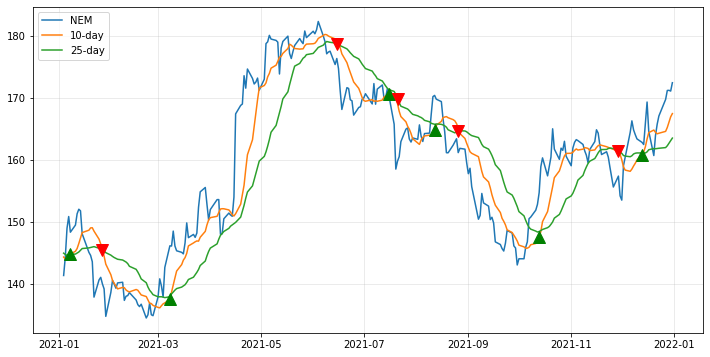

In [ ]:
# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'NEM') # actual value
plt.plot(gld.iloc[-252:]['10-day'], label = '10-day') 
plt.plot(gld.iloc[-252:]['25-day'], label = '25-day') 
plt.plot(gld[-252:].loc[gld.signal_1 == 1].index, gld[-252:]['10-day'][gld.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.signal_1 == -1].index, gld[-252:]['25-day'][gld.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

### Plot the results!

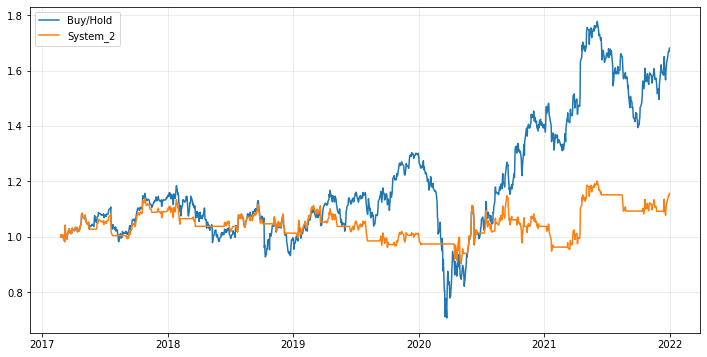

In [ ]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return_2']).cumprod(), label='System_2')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

## BLK

### Plot trades on time series

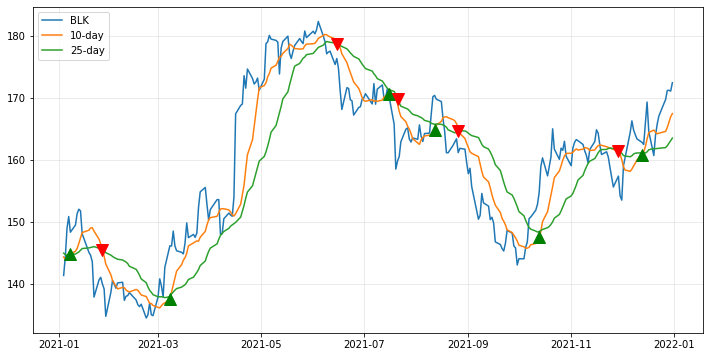

In [ ]:
# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'BLK') # actual value
plt.plot(gld.iloc[-252:]['10-day'], label = '10-day') 
plt.plot(gld.iloc[-252:]['25-day'], label = '25-day') 
plt.plot(gld[-252:].loc[gld.signal_1 == 1].index, gld[-252:]['10-day'][gld.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.signal_1 == -1].index, gld[-252:]['25-day'][gld.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

### Plot the results!

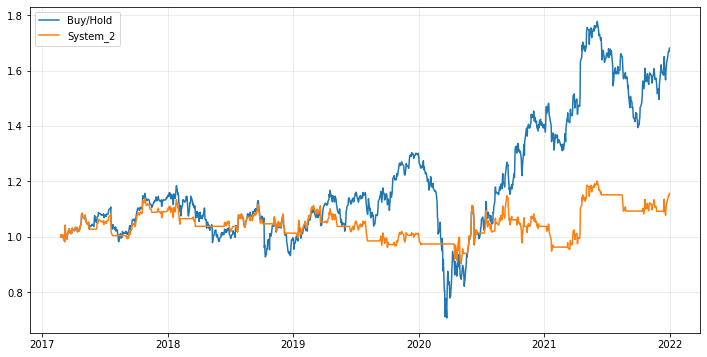

In [ ]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return_2']).cumprod(), label='System_2')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()


## PPG

### Plot trades on time series

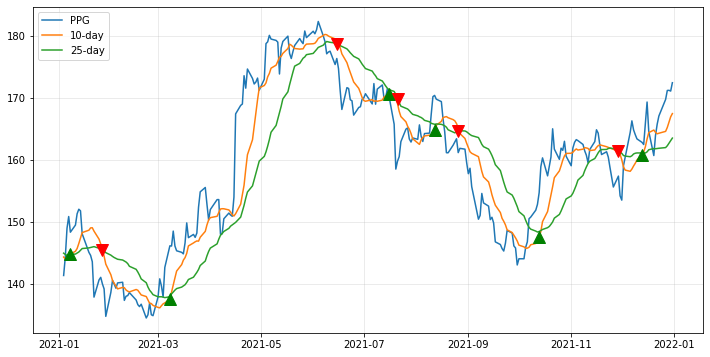

In [ ]:
# show the last year
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'PPG') # actual value
plt.plot(gld.iloc[-252:]['10-day'], label = '10-day') 
plt.plot(gld.iloc[-252:]['25-day'], label = '25-day') 
plt.plot(gld[-252:].loc[gld.signal_1 == 1].index, gld[-252:]['10-day'][gld.signal_1 == 1], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.signal_1 == -1].index, gld[-252:]['25-day'][gld.signal_1 == -1], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

### Plot the results!

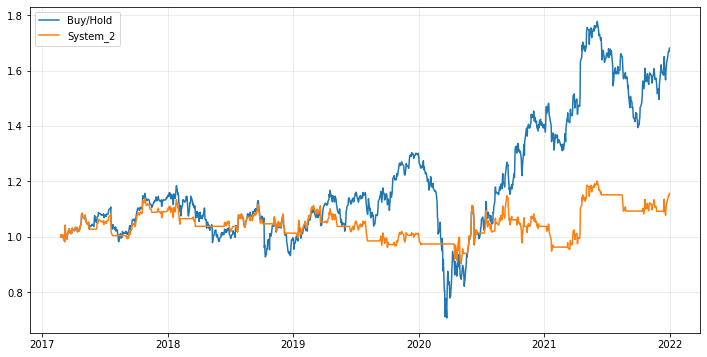

In [ ]:
plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
plt.plot(np.exp(gld['system_return_2']).cumprod(), label='System_2')
plt.legend(loc=2)
plt.grid(True, alpha=.3)
plt.show()

# Analysis

## NEM

### Buy and hold

In [ ]:
myStock = 'NEM'
gld = pdr.get_data_yahoo(myStock, start=datetime(2021, 11, 25), end=datetime(2022, 11, 1))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()


,Day,Open,High,Low,Close
Date,,,,,
2021-11-26,1,55.599998,56.099998,55.180000,55.939999
2021-11-29,2,55.669998,55.939999,54.580002,55.400002
2021-11-30,3,55.279999,56.520000,54.540001,54.919998
2021-12-01,4,55.259998,55.910000,53.860001,53.869999
2021-12-02,5,53.189999,53.619999,52.599998,53.270000


In [ ]:
# shows the different data types
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2021-11-26 to 2022-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     235 non-null    int64  
 1   Open    235 non-null    float64
 2   High    235 non-null    float64
 3   Low     235 non-null    float64
 4   Close   235 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.0 KB


In [ ]:
# compute summary statistics of each column
gld.describe()

,Day,Open,High,Low,Close
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,118.000000,59.282553,60.202213,58.383575,59.308808
std,67.982841,12.457860,12.742940,12.299889,12.590842
min,1.000000,40.500000,41.160000,40.000000,40.270000
25%,59.500000,45.330000,45.895000,44.635000,45.039999
50%,118.000000,60.919998,61.580002,60.279999,60.910000
75%,176.500000,68.000000,68.770000,67.074997,67.880001
max,235.000000,85.550003,86.370003,85.099998,85.419998


### Add moving averages to the data frame

In [ ]:
# best pairs
gld['10-day_nem'] = gld['Close'].rolling(10).mean().shift()
gld['25-day_nem'] = gld['Close'].rolling(25).mean().shift()
gld.dropna(inplace=True)
gld.head(n=10)

,Day,Open,High,Low,Close,10-day_nem,25-day_nem
Date,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886,57.3756
2022-01-04,27,61.139999,61.660000,60.290001,60.430000,60.060,57.5772
2022-01-05,28,60.919998,61.750000,60.279999,60.330002,60.232,57.7784
2022-01-06,29,59.349998,59.599998,57.869999,58.669998,60.447,57.9948
2022-01-07,30,59.439999,59.669998,58.790001,59.430000,60.464,58.1868
2022-01-10,31,59.209999,60.540001,58.930000,60.430000,60.454,58.4332
2022-01-11,32,60.430000,60.950001,59.860001,60.910000,60.479,58.6636
2022-01-12,33,61.000000,61.580002,60.450001,61.520000,60.541,58.8668
2022-01-13,34,61.470001,61.869999,61.220001,61.320000,60.631,59.0720


### Momentum trading strategy



#### Add "invested" column  
The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, **invested = 1 if the 10-day average is greater than the 25-day average**. 

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
gld['invested_best_nem'] = np.where(gld['10-day_nem'] > gld['25-day_nem'], 1, 0)
gld.head()

,Day,Open,High,Low,Close,10-day_nem,25-day_nem,invested_best_nem
Date,,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886,57.3756,1
2022-01-04,27,61.139999,61.660000,60.290001,60.430000,60.060,57.5772,1
2022-01-05,28,60.919998,61.750000,60.279999,60.330002,60.232,57.7784,1
2022-01-06,29,59.349998,59.599998,57.869999,58.669998,60.447,57.9948,1
2022-01-07,30,59.439999,59.669998,58.790001,59.430000,60.464,58.1868,1


In [ ]:
print("This is count of invested best_nem:", gld['invested_best_nem'].value_counts()) 

This is count of invested best_nem: 0    118
1     92
Name: invested_best_nem, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
gld['signal_nem'] = gld['invested_best_nem'].diff()

#### Add trading signals

In [ ]:
gld.head() # check your work

,Day,Open,High,Low,Close,10-day_nem,25-day_nem,invested_best_nem,signal_nem
Date,,,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886,57.3756,1,NaN
2022-01-04,27,61.139999,61.660000,60.290001,60.430000,60.060,57.5772,1,0.0
2022-01-05,28,60.919998,61.750000,60.279999,60.330002,60.232,57.7784,1,0.0
2022-01-06,29,59.349998,59.599998,57.869999,58.669998,60.447,57.9948,1,0.0
2022-01-07,30,59.439999,59.669998,58.790001,59.430000,60.464,58.1868,1,0.0


Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:

In [ ]:
gld.loc["2022-01-03",'signal_nem'] = 1.0
gld.head()

,Day,Open,High,Low,Close,10-day_nem,25-day_nem,invested_best_nem,signal_nem
Date,,,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886,57.3756,1,1.0
2022-01-04,27,61.139999,61.660000,60.290001,60.430000,60.060,57.5772,1,0.0
2022-01-05,28,60.919998,61.750000,60.279999,60.330002,60.232,57.7784,1,0.0
2022-01-06,29,59.349998,59.599998,57.869999,58.669998,60.447,57.9948,1,0.0
2022-01-07,30,59.439999,59.669998,58.790001,59.430000,60.464,58.1868,1,0.0


In [ ]:
gld[gld['signal_nem'].isin([1,-1])]  ## Let's see the trading days

,Day,Open,High,Low,Close,10-day_nem,25-day_nem,invested_best_nem,signal_nem
Date,,,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886000,57.375600,1,1.0
2022-04-28,106,72.779999,73.660004,72.010002,73.279999,78.838998,79.639999,0,-1.0
2022-06-08,134,67.919998,68.230003,67.059998,67.169998,68.394999,68.262399,1,1.0
2022-06-14,138,64.839996,64.849998,62.520000,63.090000,67.121999,67.158799,0,-1.0
2022-09-23,208,41.490002,41.619999,40.500000,41.250000,43.116000,43.050800,1,1.0
2022-09-27,210,41.189999,41.470001,40.240002,40.270000,42.588000,42.797200,0,-1.0
2022-10-11,220,42.230000,42.959999,41.639999,41.820000,42.815999,42.704400,1,1.0
2022-10-19,226,41.110001,41.160000,40.330002,40.369999,42.277000,42.404400,0,-1.0


### Buy and Hold strategy

### Calculating returns

In [ ]:
gld['logClose_nem'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return_nem'] = gld['logClose_nem'].diff() # the difference will be positive or negative
gld.head()

,Day,Open,High,Low,Close,10-day_nem,25-day_nem,invested_best_nem,signal_nem,logClose_nem,return_nem
Date,,,,,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886,57.3756,1,1.0,4.110546,NaN
2022-01-04,27,61.139999,61.660000,60.290001,60.430000,60.060,57.5772,1,0.0,4.101486,-0.009060
2022-01-05,28,60.919998,61.750000,60.279999,60.330002,60.232,57.7784,1,0.0,4.099830,-0.001656
2022-01-06,29,59.349998,59.599998,57.869999,58.669998,60.447,57.9948,1,0.0,4.071928,-0.027901
2022-01-07,30,59.439999,59.669998,58.790001,59.430000,60.464,58.1868,1,0.0,4.084799,0.012871


In this case, instead of deleting the first row, we prefer to set a return of 0, so let's do that.

In [ ]:
gld.loc["2022-01-03",'return_nem'] = 0.0
gld.head()

,Day,Open,High,Low,Close,10-day_nem,25-day_nem,invested_best_nem,signal_nem,logClose_nem,return_nem
Date,,,,,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886,57.3756,1,1.0,4.110546,0.000000
2022-01-04,27,61.139999,61.660000,60.290001,60.430000,60.060,57.5772,1,0.0,4.101486,-0.009060
2022-01-05,28,60.919998,61.750000,60.279999,60.330002,60.232,57.7784,1,0.0,4.099830,-0.001656
2022-01-06,29,59.349998,59.599998,57.869999,58.669998,60.447,57.9948,1,0.0,4.071928,-0.027901
2022-01-07,30,59.439999,59.669998,58.790001,59.430000,60.464,58.1868,1,0.0,4.084799,0.012871


In [ ]:
# Create a dataframe to store returns of all three stocks
portfolio = pd.DataFrame()
portfolio['Day'] = gld['Day']
portfolio['return_nem'] = gld['return_nem']

Finally, what is the return of the buy&hold strategy?

In [ ]:
bh_nem= np.exp(np.sum(gld['return_nem'])) -1
bh_nem

-0.31600525750113784

### System return

Let's see now how much money this is strategy is making (or losing!!!). Note that our investment will only change when we are invested.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!

gld['system_return_best_nem'] = gld['invested_best_nem'] * gld['return_nem']
portfolio['system_return_best_nem'] = gld['system_return_best_nem']
gld.head()

,Day,Open,High,Low,Close,10-day_nem,25-day_nem,invested_best_nem,signal_nem,logClose_nem,return_nem,system_return_best_nem
Date,,,,,,,,,,,,
2022-01-03,26,61.169998,61.750000,60.900002,60.980000,59.886,57.3756,1,1.0,4.110546,0.000000,0.000000
2022-01-04,27,61.139999,61.660000,60.290001,60.430000,60.060,57.5772,1,0.0,4.101486,-0.009060,-0.009060
2022-01-05,28,60.919998,61.750000,60.279999,60.330002,60.232,57.7784,1,0.0,4.099830,-0.001656,-0.001656
2022-01-06,29,59.349998,59.599998,57.869999,58.669998,60.447,57.9948,1,0.0,4.071928,-0.027901,-0.027901
2022-01-07,30,59.439999,59.669998,58.790001,59.430000,60.464,58.1868,1,0.0,4.084799,0.012871,0.012871


## BLK

### Buy and hold

In [ ]:
myStock = 'BLK'
gld = pdr.get_data_yahoo(myStock, start=datetime(2021, 11, 25), end=datetime(2022, 11, 1))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,Day,Open,High,Low,Close
Date,,,,,
2021-11-26,1,902.770020,914.059998,896.849976,901.640015
2021-11-29,2,914.780029,934.760010,905.820007,928.000000
2021-11-30,3,919.609985,924.989990,902.020020,904.609985
2021-12-01,4,921.500000,929.440002,899.780029,900.330017
2021-12-02,5,901.510010,924.059998,901.159973,918.849976


In [ ]:
# shows the different data types
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2021-11-26 to 2022-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     235 non-null    int64  
 1   Open    235 non-null    float64
 2   High    235 non-null    float64
 3   Low     235 non-null    float64
 4   Close   235 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.0 KB


In [ ]:
# compute summary statistics of each column
gld.describe()

,Day,Open,High,Low,Close
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,118.000000,709.485191,718.290681,699.625703,708.574849
std,67.982841,107.917993,106.856330,107.004224,106.567422
min,1.000000,505.059998,538.429993,503.119995,531.099976
25%,59.500000,623.190002,630.230011,614.394989,624.190002
50%,118.000000,681.539978,698.570007,675.770020,686.489990
75%,176.500000,773.910004,782.165009,763.029999,771.125000
max,235.000000,928.479980,934.760010,921.130005,928.000000


### Add moving averages to the data frame

In [ ]:
# best pairs
gld['10-day_blk'] = gld['Close'].rolling(10).mean().shift()
gld['25-day_blk'] = gld['Close'].rolling(25).mean().shift()
gld.dropna(inplace=True)
gld.head(n=10)

,Day,Open,High,Low,Close,10-day_blk,25-day_blk
Date,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991
2022-01-06,29,893.359985,898.179993,884.030029,895.489990,912.960992,912.492393
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792
2022-01-10,31,888.700012,889.869995,862.840027,873.340027,909.190997,911.235593
2022-01-11,32,871.750000,888.909973,861.770020,888.190002,904.267999,910.186394
2022-01-12,33,895.549988,899.969971,880.859985,885.109985,900.904999,909.845994
2022-01-13,34,890.729980,891.159973,864.119995,867.580017,898.444000,908.413594


### Momentum trading strategy



#### Add "invested" column  
The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, **invested = 1 if the 10-day average is greater than the 25-day average**. 

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
gld['invested_best_blk'] = np.where(gld['10-day_blk'] > gld['25-day_blk'], 1, 0)
gld.head()

,Day,Open,High,Low,Close,10-day_blk,25-day_blk,invested_best_blk
Date,,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594,1
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192,0
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991,1
2022-01-06,29,893.359985,898.179993,884.030029,895.489990,912.960992,912.492393,1
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792,0


In [ ]:
print("This is count of invested best_blk:", gld['invested_best_blk'].value_counts()) 

This is count of invested best_blk: 0    149
1     61
Name: invested_best_blk, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
gld['signal_blk'] = gld['invested_best_blk'].diff()

#### Add trading signals

In [ ]:
gld.head() # check your work

,Day,Open,High,Low,Close,10-day_blk,25-day_blk,invested_best_blk,signal_blk
Date,,,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594,1,NaN
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192,0,-1.0
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991,1,1.0
2022-01-06,29,893.359985,898.179993,884.030029,895.489990,912.960992,912.492393,1,0.0
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792,0,-1.0


Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:

In [ ]:
gld.loc["2022-01-03",'signal_blk'] = 1.0
gld.head()

,Day,Open,High,Low,Close,10-day_blk,25-day_blk,invested_best_blk,signal_blk
Date,,,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594,1,1.0
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192,0,-1.0
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991,1,1.0
2022-01-06,29,893.359985,898.179993,884.030029,895.489990,912.960992,912.492393,1,0.0
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792,0,-1.0


In [ ]:
gld[gld['signal_blk'].isin([1,-1])]  ## Let's see the trading days

,Day,Open,High,Low,Close,10-day_blk,25-day_blk,invested_best_blk,signal_blk
Date,,,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594,1,1.0
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192,0,-1.0
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991,1,1.0
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792,0,-1.0
2022-03-25,83,739.960022,743.960022,735.320007,741.039978,725.831006,723.955603,1,1.0
2022-04-19,99,681.500000,704.659973,681.500000,701.570007,730.599994,738.108799,0,-1.0
2022-06-02,130,662.409973,689.200012,661.510010,686.489990,629.040002,625.391196,1,1.0
2022-06-21,142,596.750000,616.859985,595.750000,614.539978,625.275995,629.081597,0,-1.0
2022-07-28,168,647.630005,663.940002,638.809998,659.979980,622.496008,619.994404,1,1.0


### Buy and Hold strategy

### Calculating returns
The function `.diff()` calculates the difference between the current row and previous row. That's why there is a `NaN` at the beginning of the dataframe when we create the `gld['return']` column.

We want to calculate the returns using `.diff()`, so we need to take the log of the close values. `gld['return']` will be the **'buy and hold' return** (i.e., we will buy in the first day and sell in the last day, regardless of what's happening in the market). And later, we will make a variable for our system, the momentum trading algorithm!

In [ ]:
gld['logClose_blk'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return_blk'] = gld['logClose_blk'].diff() # the difference will be positive or negative
gld.head()

,Day,Open,High,Low,Close,10-day_blk,25-day_blk,invested_best_blk,signal_blk,logClose_blk,return_blk
Date,,,,,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594,1,1.0,6.815344,NaN
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192,0,-1.0,6.821347,0.006003
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991,1,1.0,6.793208,-0.028139
2022-01-06,29,893.359985,898.179993,884.030029,895.489990,912.960992,912.492393,1,0.0,6.797371,0.004163
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792,0,-1.0,6.793769,-0.003602


In this case, instead of deleting the first row, I prefer to set a return of 0, so let's do that.

In [ ]:
gld.loc["2022-01-03",'return_blk'] = 0.0
portfolio['return_blk'] = gld['return_blk']
gld.head()

,Day,Open,High,Low,Close,10-day_blk,25-day_blk,invested_best_blk,signal_blk,logClose_blk,return_blk
Date,,,,,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594,1,1.0,6.815344,0.000000
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192,0,-1.0,6.821347,0.006003
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991,1,1.0,6.793208,-0.028139
2022-01-06,29,893.359985,898.179993,884.030029,895.489990,912.960992,912.492393,1,0.0,6.797371,0.004163
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792,0,-1.0,6.793769,-0.003602


Finally, what is the return of the buy&hold strategy?

In [ ]:
bh_blk= np.exp(np.sum(gld['return_blk'])) -1
bh_blk

-0.28487598963808825

### System return

Let's see now how much money this is strategy is making (or losing!!!). Note that our investment will only change when we are invested.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!

gld['system_return_best_blk'] = gld['invested_best_blk'] * gld['return_blk']
portfolio['system_return_best_blk'] = gld['system_return_best_blk']

gld.head()

,Day,Open,High,Low,Close,10-day_blk,25-day_blk,invested_best_blk,signal_blk,logClose_blk,return_blk,system_return_best_blk
Date,,,,,,,,,,,,
2022-01-03,26,918.340027,922.070007,905.429993,911.729980,913.061993,913.033594,1,1.0,6.815344,0.000000,0.000000
2022-01-04,27,917.719971,927.479980,916.559998,917.219971,912.877991,913.437192,0,-1.0,6.821347,0.006003,0.000000
2022-01-05,28,918.150024,925.500000,890.830017,891.770020,914.870990,913.005991,1,1.0,6.793208,-0.028139,-0.028139
2022-01-06,29,893.359985,898.179993,884.030029,895.489990,912.960992,912.492393,1,0.0,6.797371,0.004163,0.004163
2022-01-07,30,895.270020,896.630005,884.000000,892.270020,911.355994,912.298792,0,-1.0,6.793769,-0.003602,-0.000000


## PPG

### Buy and hold

In [ ]:
myStock = 'PPG'
gld = pdr.get_data_yahoo(myStock, start=datetime(2021, 11, 25), end=datetime(2022, 11, 1))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,Day,Open,High,Low,Close
Date,,,,,
2021-11-26,1,155.119995,156.389999,153.110001,155.600006
2021-11-29,2,156.899994,158.449997,156.220001,157.360001
2021-11-30,3,155.839996,157.850006,153.830002,154.169998
2021-12-01,4,156.350006,159.050003,153.399994,153.479996
2021-12-02,5,154.339996,159.839996,154.229996,159.029999


In [ ]:
# shows the different data types
gld.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2021-11-26 to 2022-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     235 non-null    int64  
 1   Open    235 non-null    float64
 2   High    235 non-null    float64
 3   Low     235 non-null    float64
 4   Close   235 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.0 KB


In [ ]:
# compute summary statistics of each column
gld.describe()

,Day,Open,High,Low,Close
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,118.000000,133.193107,134.915362,131.347532,133.062681
std,67.982841,18.016044,18.010243,18.085865,17.990365
min,1.000000,107.790001,110.050003,107.059998,108.410004
25%,59.500000,119.774998,122.079998,117.570000,119.724998
50%,118.000000,128.369995,129.800003,126.489998,128.110001
75%,176.500000,149.465004,150.135002,146.750000,147.860001
max,235.000000,173.210007,177.320007,171.229996,173.100006


### Add moving averages to the data frame

In [ ]:
# best pairs
gld['10-day_ppg'] = gld['Close'].rolling(10).mean().shift()
gld['25-day_ppg'] = gld['Close'].rolling(25).mean().shift()
gld.dropna(inplace=True)
gld.head(n=10)

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg
Date,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000
2022-01-04,27,170.330002,172.990005,170.300003,171.250000,168.368001,164.644000
2022-01-05,28,172.080002,177.320007,171.229996,173.100006,169.425002,165.199600
2022-01-06,29,173.210007,173.300003,169.889999,170.619995,170.342003,165.956801
2022-01-07,30,170.429993,170.509995,167.429993,167.710007,170.830002,166.642401
2022-01-10,31,167.009995,167.500000,164.899994,166.190002,170.895003,166.989601
2022-01-11,32,166.740005,169.020004,164.880005,168.809998,170.540002,167.221601
2022-01-12,33,169.509995,169.589996,167.029999,168.449997,170.302002,167.396801
2022-01-13,34,169.410004,171.130005,168.250000,168.820007,170.026001,167.483601


### Momentum trading strategy



#### Add "invested" column  
The purpose of this column is to show whether we are currently investing money or if we are out of the market. More precisely, **invested = 1 if the 10-day average is greater than the 25-day average**. 

In [ ]:
# the np.where() function is similar to the Excel =IF() statement
gld['invested_best_ppg'] = np.where(gld['10-day_ppg'] > gld['25-day_ppg'], 1, 0)
gld.head()

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg,invested_best_ppg
Date,,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000,1
2022-01-04,27,170.330002,172.990005,170.300003,171.250000,168.368001,164.644000,1
2022-01-05,28,172.080002,177.320007,171.229996,173.100006,169.425002,165.199600,1
2022-01-06,29,173.210007,173.300003,169.889999,170.619995,170.342003,165.956801,1
2022-01-07,30,170.429993,170.509995,167.429993,167.710007,170.830002,166.642401,1


In [ ]:
print("This is count of invested best_ppg:", gld['invested_best_ppg'].value_counts()) 

This is count of invested best_ppg: 0    140
1     70
Name: invested_best_ppg, dtype: int64


In [ ]:
# the variable signal tells you when you buy and sell
# we will use it to make red and green triangles
gld['signal_ppg'] = gld['invested_best_ppg'].diff()

#### Add trading signals

In [ ]:
gld.head() # check your work

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg,invested_best_ppg,signal_ppg
Date,,,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000,1,NaN
2022-01-04,27,170.330002,172.990005,170.300003,171.250000,168.368001,164.644000,1,0.0
2022-01-05,28,172.080002,177.320007,171.229996,173.100006,169.425002,165.199600,1,0.0
2022-01-06,29,173.210007,173.300003,169.889999,170.619995,170.342003,165.956801,1,0.0
2022-01-07,30,170.429993,170.509995,167.429993,167.710007,170.830002,166.642401,1,0.0


Ugly first line again. Let's set signal to 1, i.e., we want to buy on the first trading day:

In [ ]:
gld.loc["2022-01-03",'signal_ppg'] = 1.0
gld.head()

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg,invested_best_ppg,signal_ppg
Date,,,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000,1,1.0
2022-01-04,27,170.330002,172.990005,170.300003,171.250000,168.368001,164.644000,1,0.0
2022-01-05,28,172.080002,177.320007,171.229996,173.100006,169.425002,165.199600,1,0.0
2022-01-06,29,173.210007,173.300003,169.889999,170.619995,170.342003,165.956801,1,0.0
2022-01-07,30,170.429993,170.509995,167.429993,167.710007,170.830002,166.642401,1,0.0


In [ ]:
gld[gld['signal_ppg'].isin([1,-1])]  ## Let's see the trading days

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg,invested_best_ppg,signal_ppg
Date,,,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000,1,1.0
2022-01-20,38,161.190002,162.779999,159.149994,159.699997,167.404001,167.648001,0,-1.0
2022-03-29,85,133.380005,137.910004,132.639999,135.889999,128.748001,128.477200,1,1.0
2022-04-21,101,135.830002,137.539993,132.910004,133.149994,130.796999,130.870800,0,-1.0
2022-06-08,134,127.160004,133.990005,126.620003,127.010002,126.321999,125.822000,1,1.0
2022-06-15,139,113.440002,115.080002,111.449997,113.620003,122.724000,123.178800,0,-1.0
2022-07-11,155,116.580002,117.209999,113.879997,114.169998,118.612000,118.313200,1,1.0
2022-08-31,192,129.130005,129.289993,126.419998,126.980003,129.442001,130.088000,0,-1.0


### Buy and Hold strategy

### Calculating returns


In [ ]:
gld['logClose_ppg'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return_ppg'] = gld['logClose_ppg'].diff() # the difference will be positive or negative
gld.head()

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg,invested_best_ppg,signal_ppg,logClose_ppg,return_ppg
Date,,,,,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000,1,1.0,5.139322,NaN
2022-01-04,27,170.330002,172.990005,170.300003,171.250000,168.368001,164.644000,1,0.0,5.143124,0.003803
2022-01-05,28,172.080002,177.320007,171.229996,173.100006,169.425002,165.199600,1,0.0,5.153869,0.010745
2022-01-06,29,173.210007,173.300003,169.889999,170.619995,170.342003,165.956801,1,0.0,5.139439,-0.014431
2022-01-07,30,170.429993,170.509995,167.429993,167.710007,170.830002,166.642401,1,0.0,5.122236,-0.017202


In this case, instead of deleting the first row, I prefer to set a return of 0, so let's do that.

In [ ]:
gld.loc["2022-01-03",'return_ppg'] = 0.0
portfolio['return_ppg'] = gld['return_ppg']
gld.head()

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg,invested_best_ppg,signal_ppg,logClose_ppg,return_ppg
Date,,,,,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000,1,1.0,5.139322,0.000000
2022-01-04,27,170.330002,172.990005,170.300003,171.250000,168.368001,164.644000,1,0.0,5.143124,0.003803
2022-01-05,28,172.080002,177.320007,171.229996,173.100006,169.425002,165.199600,1,0.0,5.153869,0.010745
2022-01-06,29,173.210007,173.300003,169.889999,170.619995,170.342003,165.956801,1,0.0,5.139439,-0.014431
2022-01-07,30,170.429993,170.509995,167.429993,167.710007,170.830002,166.642401,1,0.0,5.122236,-0.017202


Finally, what is the return of the buy&hold strategy?

In [ ]:
bh_ppg= np.exp(np.sum(gld['return_ppg'])) -1
bh_ppg

-0.3317702466503557

### System return

Let's see now how much money this is strategy is making (or losing!!!). Note that our investment will only change when we are invested.

In [ ]:
# The 'system_return' tells you how much money you would have made
# using your momentum trading algorithm!

gld['system_return_best_ppg'] = gld['invested_best_ppg'] * gld['return_ppg']
portfolio['system_return_best_ppg'] = gld['system_return_best_ppg']

gld.head()

,Day,Open,High,Low,Close,10-day_ppg,25-day_ppg,invested_best_ppg,signal_ppg,logClose_ppg,return_ppg,system_return_best_ppg
Date,,,,,,,,,,,,
2022-01-03,26,172.100006,172.910004,169.610001,170.600006,167.767000,164.044000,1,1.0,5.139322,0.000000,0.000000
2022-01-04,27,170.330002,172.990005,170.300003,171.250000,168.368001,164.644000,1,0.0,5.143124,0.003803,0.003803
2022-01-05,28,172.080002,177.320007,171.229996,173.100006,169.425002,165.199600,1,0.0,5.153869,0.010745,0.010745
2022-01-06,29,173.210007,173.300003,169.889999,170.619995,170.342003,165.956801,1,0.0,5.139439,-0.014431,-0.014431
2022-01-07,30,170.429993,170.509995,167.429993,167.710007,170.830002,166.642401,1,0.0,5.122236,-0.017202,-0.017202


## Portfolio Value in Buy & Hold Strategy

In [ ]:
# Initial Investment values for each stock
N = 0.307
B = 0.587
P = 0.106
Investment = 100000     # Initial Investment of $100,000
Inv_NEM = N*Investment
Inv_BLK = B*Investment
Inv_PPG = P*Investment

In [ ]:
# Add Date column to group by Date
portfolio.head()
portfolio['Date'] = portfolio.index
portfolio.head()

,Day,return_nem,system_return_best_nem,return_blk,system_return_best_blk,return_ppg,system_return_best_ppg,Date
Date,,,,,,,,
2022-01-03,26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-01-03
2022-01-04,27,-0.009060,-0.009060,0.006003,0.000000,0.003803,0.003803,2022-01-04
2022-01-05,28,-0.001656,-0.001656,-0.028139,-0.028139,0.010745,0.010745,2022-01-05
2022-01-06,29,-0.027901,-0.027901,0.004163,0.004163,-0.014431,-0.014431,2022-01-06
2022-01-07,30,0.012871,0.012871,-0.003602,-0.000000,-0.017202,-0.017202,2022-01-07


In [ ]:
# Group returns by month, and then calculate cumulative sum to find value of stocks at start of each month
import datetime as dt
portfolio_bh = portfolio.groupby(portfolio['Date'].dt.month)[['return_nem', 'return_blk', 'return_ppg']].sum().cumsum()

In [ ]:
portfolio_bh['Date'] = ["2022-01-03","2022-02-01", "2022-03-01","2022-04-01","2022-05-02", "2022-06-01","2022-07-01","2022-08-01","2022-09-01","2022-10-03", "2022-11-01"]

In [ ]:
# Multiply percentage return by the initial investment amount to find dollar value of returns
portfolio_bh['Inv_NEM'] = (np.exp(portfolio_bh['return_nem']))*Inv_NEM
portfolio_bh['Inv_BLK'] = (np.exp(portfolio_bh['return_blk']))*Inv_NEM
portfolio_bh['Inv_PPG'] = (np.exp(portfolio_bh['return_ppg']))*Inv_NEM
portfolio_bh['total_investment'] = portfolio_bh['Inv_NEM']+portfolio_bh['Inv_BLK']+portfolio_bh['Inv_PPG']
portfolio_bh.index.name = None
portfolio_bh[['Date','Inv_NEM','Inv_BLK','Inv_PPG','total_investment']]


,Date,Inv_NEM,Inv_BLK,Inv_PPG,total_investment
1,2022-01-03,30795.653622,27710.241646,28108.673709,86614.568977
2,2022-02-01,33327.975099,25048.450681,24014.740678,82391.166458
3,2022-03-01,39998.604864,25731.322845,23586.454167,89316.381877
4,2022-04-01,36675.876844,21034.380997,23032.196916,80742.454756
5,2022-05-02,34158.658065,22529.429727,22762.267265,79450.355057
6,2022-06-01,30040.487988,20507.746510,20575.836823,71124.071322
7,2022-07-01,22795.932649,22532.796130,23266.135122,68594.863901
8,2022-08-01,20822.434048,22438.851291,22850.445273,66111.730613
9,2022-09-01,21159.740443,18529.166816,19919.009105,59607.916364
10,2022-10-03,21305.739593,21749.242210,20547.045041,63602.026844


In [ ]:
print('Buy & Hold Strategy Portfolio Value = $', round(portfolio_bh.loc[11,'total_investment'],2))

Buy & Hold Strategy Portfolio Value = $ 63467.6


## Portfolio Value in Momentum Trading Strategy

In [ ]:
portfolio.head()

,Day,return_nem,system_return_best_nem,return_blk,system_return_best_blk,return_ppg,system_return_best_ppg,Date
Date,,,,,,,,
2022-01-03,26,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-01-03
2022-01-04,27,-0.009060,-0.009060,0.006003,0.000000,0.003803,0.003803,2022-01-04
2022-01-05,28,-0.001656,-0.001656,-0.028139,-0.028139,0.010745,0.010745,2022-01-05
2022-01-06,29,-0.027901,-0.027901,0.004163,0.004163,-0.014431,-0.014431,2022-01-06
2022-01-07,30,0.012871,0.012871,-0.003602,-0.000000,-0.017202,-0.017202,2022-01-07


In [ ]:
# Group returns by month, and then calculate cumulative sum to find value of stocks at start of each month
portfolio_mt = portfolio.groupby(portfolio['Date'].dt.month)[['system_return_best_nem', 'system_return_best_blk', 'system_return_best_ppg']].sum().cumsum()

In [ ]:
portfolio_mt['Date'] = ["2022-01-03","2022-02-01", "2022-03-01","2022-04-01","2022-05-02", "2022-06-01","2022-07-01","2022-08-01","2022-09-01","2022-10-03", "2022-11-01"]

In [ ]:
# Multiply percentage return by the initial investment amount to find dollar value of returns
portfolio_mt['Inv_NEM'] = (np.exp(portfolio_mt['system_return_best_nem']))*Inv_NEM
portfolio_mt['Inv_BLK'] = (np.exp(portfolio_mt['system_return_best_blk']))*Inv_BLK
portfolio_mt['Inv_PPG'] = (np.exp(portfolio_mt['system_return_best_ppg']))*Inv_PPG
portfolio_mt['total_investment'] = portfolio_mt['Inv_NEM']+portfolio_mt['Inv_BLK']+portfolio_mt['Inv_PPG']
portfolio_mt.index.name = None
portfolio_mt[['Date','Inv_NEM','Inv_BLK','Inv_PPG','total_investment']] 

,Date,Inv_NEM,Inv_BLK,Inv_PPG,total_investment
1,2022-01-03,30795.653622,57309.330483,10037.690335,98142.674440
2,2022-02-01,33327.975099,57309.330483,10037.690335,100674.995917
3,2022-03-01,39998.604864,59319.050168,10155.462097,109473.117129
4,2022-04-01,36313.396725,52785.316116,10204.274452,99302.987293
5,2022-05-02,36313.396725,52785.316116,10204.274452,99302.987293
6,2022-06-01,34332.571629,46531.889332,8835.833800,89700.294761
7,2022-07-01,34332.571629,48402.364310,9691.905201,92426.841140
8,2022-08-01,34332.571629,48200.562800,9578.712190,92111.846619
9,2022-09-01,32789.625592,48200.562800,9578.712190,90568.900582
10,2022-10-03,32339.816738,48956.228739,9578.712190,90874.757667


In [ ]:
print('Momentum Trading Strategy Portfolio Value = $', round(portfolio_mt.loc[11,'total_investment'],2))

Momentum Trading Strategy Portfolio Value = $ 91336.35


## S&P 500 - Index Investing

In [ ]:
myStock = '^GSPC'
sp500 = pdr.get_data_yahoo(myStock, start=datetime(2022, 1, 1), end=datetime(2022, 11, 1))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
sp500['Day'] = day
sp500.drop(columns=['Adj Close', 'Volume'], inplace = True)
sp500 = sp500[['Day', 'Open', 'High', 'Low', 'Close']]
sp500.head()

,Day,Open,High,Low,Close
Date,,,,,
2022-01-03,1,4778.140137,4796.640137,4758.169922,4796.560059
2022-01-04,2,4804.509766,4818.620117,4774.270020,4793.540039
2022-01-05,3,4787.990234,4797.700195,4699.439941,4700.580078
2022-01-06,4,4693.390137,4725.009766,4671.259766,4696.049805
2022-01-07,5,4697.660156,4707.950195,4662.740234,4677.029785


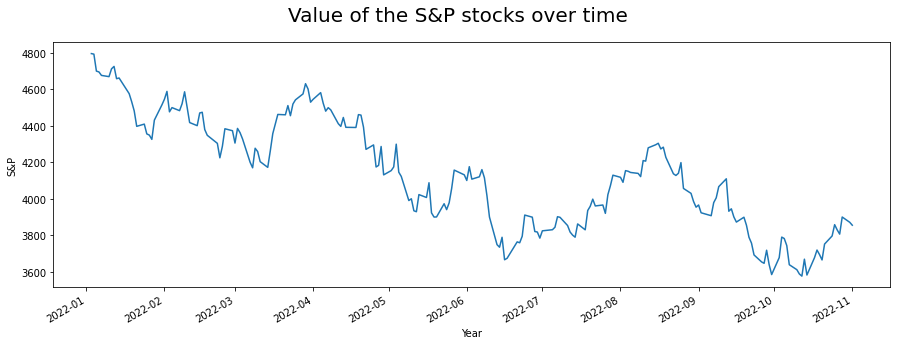

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
sp500['Close'].plot(ax = ax)
ax.set_xlabel('Year')
ax.set_ylabel('S&P')
fig.suptitle("Value of the S&P stocks over time", fontsize=20)
plt.show()

Extract the S&P 500 data in the first business day of each month.

In [ ]:
sp500.head()
sp500['Date'] = sp500.index

sp500.head()

,Day,Open,High,Low,Close,Date
Date,,,,,,
2022-01-03,1,4778.140137,4796.640137,4758.169922,4796.560059,2022-01-03
2022-01-04,2,4804.509766,4818.620117,4774.270020,4793.540039,2022-01-04
2022-01-05,3,4787.990234,4797.700195,4699.439941,4700.580078,2022-01-05
2022-01-06,4,4693.390137,4725.009766,4671.259766,4696.049805,2022-01-06
2022-01-07,5,4697.660156,4707.950195,4662.740234,4677.029785,2022-01-07


In [ ]:
sp500['Close_Return'] = sp500["Close"].pct_change() #percentage change from previous month

In [ ]:
sp500.head()

,Day,Open,High,Low,Close,Date,Close_Return
Date,,,,,,,
2022-01-03,1,4778.140137,4796.640137,4758.169922,4796.560059,2022-01-03,NaN
2022-01-04,2,4804.509766,4818.620117,4774.270020,4793.540039,2022-01-04,-0.000630
2022-01-05,3,4787.990234,4797.700195,4699.439941,4700.580078,2022-01-05,-0.019393
2022-01-06,4,4693.390137,4725.009766,4671.259766,4696.049805,2022-01-06,-0.000964
2022-01-07,5,4697.660156,4707.950195,4662.740234,4677.029785,2022-01-07,-0.004050


In [ ]:
sp500.loc["2022-01-03","Close_Return"] = 0.0
# set NA as 0

In [ ]:
sp500 ## return % of each month

,Day,Open,High,Low,Close,Date,Close_Return
Date,,,,,,,
2022-01-03,1,4778.140137,4796.640137,4758.169922,4796.560059,2022-01-03,0.000000
2022-01-04,2,4804.509766,4818.620117,4774.270020,4793.540039,2022-01-04,-0.000630
2022-01-05,3,4787.990234,4797.700195,4699.439941,4700.580078,2022-01-05,-0.019393
2022-01-06,4,4693.390137,4725.009766,4671.259766,4696.049805,2022-01-06,-0.000964
2022-01-07,5,4697.660156,4707.950195,4662.740234,4677.029785,2022-01-07,-0.004050
...,...,...,...,...,...,...,...
2022-10-26,206,3825.969971,3886.149902,3824.070068,3830.600098,2022-10-26,-0.007388
2022-10-27,207,3834.689941,3859.949951,3803.790039,3807.300049,2022-10-27,-0.006083
2022-10-28,208,3808.260010,3905.419922,3808.260010,3901.060059,2022-10-28,0.024626


In [ ]:
sp500['Date'] = sp500.index
sp500.head()

,Day,Open,High,Low,Close,Date,Close_Return
Date,,,,,,,
2022-01-03,1,4778.140137,4796.640137,4758.169922,4796.560059,2022-01-03,0.000000
2022-01-04,2,4804.509766,4818.620117,4774.270020,4793.540039,2022-01-04,-0.000630
2022-01-05,3,4787.990234,4797.700195,4699.439941,4700.580078,2022-01-05,-0.019393
2022-01-06,4,4693.390137,4725.009766,4671.259766,4696.049805,2022-01-06,-0.000964
2022-01-07,5,4697.660156,4707.950195,4662.740234,4677.029785,2022-01-07,-0.004050


In [ ]:
# Grouping returns by month
sp500 = sp500.groupby(sp500['Date'].dt.month)[['Close_Return']].sum().cumsum()

In [ ]:
# Adding the date-values
sp500['Date'] = ["2022-01-03","2022-02-01", "2022-03-01","2022-04-01","2022-05-02", "2022-06-01","2022-07-01","2022-08-01","2022-09-01","2022-10-03", "2022-11-01"]
sp500.index.name = None

In [ ]:
sp500[['Date', 'Close_Return']]

,Date,Close_Return
1,2022-01-03,-0.059000
2,2022-02-01,-0.089017
3,2022-03-01,-0.051500
4,2022-04-01,-0.141077
5,2022-05-02,-0.137118
6,2022-06-01,-0.221136
7,2022-07-01,-0.132357
8,2022-08-01,-0.174039
9,2022-09-01,-0.269590
10,2022-10-03,-0.189528


In [ ]:
print('S&P 500 returns = ', sp500.loc[11,'Close_Return'])

S&P 500 returns =  -0.1936296898840031


In [ ]:
print('Return amount = ', (1+sp500.loc[11,'Close_Return'])*100000)

Return amount =  80637.0310115997


## Compare and analyze the results obtained by the three strategies

In [ ]:
graph = pd.DataFrame()
graph['Date'] = sp500['Date']
graph['Buy & Hold'] = portfolio_bh['total_investment']
graph['Momentum Traing'] = portfolio_mt['total_investment']
graph['SP500'] = (1+sp500['Close_Return'])*100000
graph

,Date,Buy & Hold,Momentum Traing,SP500
1,2022-01-03,86614.568977,98142.674440,94099.972612
2,2022-02-01,82391.166458,100674.995917,91098.251017
3,2022-03-01,89316.381877,109473.117129,94849.951176
4,2022-04-01,80742.454756,99302.987293,85892.342332
5,2022-05-02,79450.355057,99302.987293,86288.208842
6,2022-06-01,71124.071322,89700.294761,77886.423297
7,2022-07-01,68594.863901,92426.841140,86764.279798
8,2022-08-01,66111.730613,92111.846619,82596.122795
9,2022-09-01,59607.916364,90568.900582,73041.031307
10,2022-10-03,63602.026844,90874.757667,81047.154072


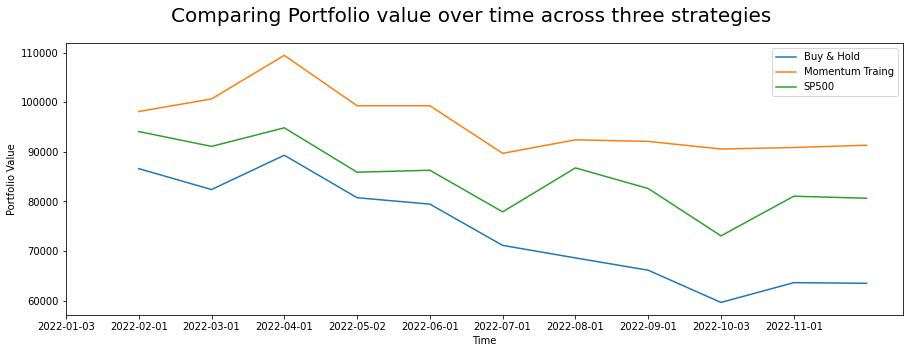

In [ ]:
ffig,ax = plt.subplots(figsize=(15,5))
graph.iloc[:,1:4].plot(ax = ax)
ax.set_xlabel('Time')
ax.set_ylabel('Portfolio Value')
fig.suptitle("Comparing Portfolio value over time across three strategies", fontsize=20)
x_vals = range(0, len(graph['Date']))
plt.xticks(x_vals, graph['Date'].to_list())
#ax.set_xticklabels(graph['Date'].to_list(), rotation=0)
plt.show()

In [ ]:
# Tabulating the results
results = pd.DataFrame(columns = ['Strategy', 'Portfolio Value'])
results.loc[len(results.index)] = ['Buy & Hold Strategy',round(portfolio_bh.loc[11,'total_investment'],2)]
results.loc[len(results.index)] = ['Momentum Trading Strategy', round(portfolio_mt.loc[11,'total_investment'],2)]
results.loc[len(results.index)] = ['S&P500 Index Investing', ((1+sp500.loc[11,'Close_Return'])*100000)]
results

,Strategy,Portfolio Value
0,Buy & Hold Strategy,63467.600000
1,Momentum Trading Strategy,91336.350000
2,S&P500 Index Investing,80637.031012


# Conclusion

##Closing Thoughts

1. On the daily returns chart, we can observe that there is a high volatility in the beginning of 2020. The stock markets across the world suddenly crashed after growing instability due to the COVID-19 pandemic, and this reflects the volatility in our charts as well.

2. On the daily returns chart, we can tell that among three sectors, materials sector displays high volatility through out the years followed by, energy sector and financial sector. From this observation, we can say that  the raw materials markets are known for being volatile.

3. On the parameter analysis, the allocation of Blackstone increases when the risk increases. Blackstone can be classified as a growth stock since it's expected to grow sales and earnings at a faster rate than that of  market average. In the meanwhile, the stock price is expensive which is common feature of a growth stock.

4. By comparing these three strategies, we can see that Buy & Hold strategy gives the worst returns, while Momentum Trading performs the best among them all. 

5.  Since 2022, we saw stock markets over the world go in a downtrend, all three strategies give negative returns and the value of our portfolio has decreased in all the three strategies.

6. From 2017, buy and hold would have given a better return than momentum trading strategy.

7. Momentum trading can be further optimized by running a loop across various pairs of moving averages to find an optimal pair.

8. In an upbeat market, the buy and hold or the index strategy might work better, but in a mixed market or in a downtrend, the momentum trading strategy might give better returns. 




## Group Member Contribution 

**Ping-Jui Han: **
Editor of Momentum Trading
Inspector of Optimization Model

**Yi-Chun Jen:**
Editor of Momentum Trading
Inspector of Optimization Model

**Shin Young Park:**
Editor of Optimization Model
Inspector of Momentum Trading
Arrange team meeing
Select stocks from the assign sectors

**Shailesh Yadav:**
Editor of Optimization Model
Inspector of Momentum Trading
Review codes


 
